# Data Mining Final Project - Group B

#### Authors : Bharadwaj Kacharla, Claire Lin, Nikhil Joshi, Nouf Alzamel, Xiaoqing Li, Zoe Yu

In [ ]:
## Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None
import matplotlib as mpl
import matplotlib.pyplot as plt
from   matplotlib.pyplot import figure
import sklearn

from sklearn.manifold import TSNE
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
 
from sklearn.utils import check_random_state
from sklearn.cluster import KMeans
from sklearn.cluster import k_means_

!pip install nose
from nose.tools import assert_equal, assert_is_instance, assert_true, assert_is_not
from numpy.testing import assert_array_equal, assert_array_almost_equal, assert_almost_equal



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


     |████████████████████████████████| 163kB 2.8MB/s 


In [1]:
#Setting up google authentication services
# Importing drive
#from google.colab import drive
#drive.mount('/content/drive')
#import string

## Dataset Exploration : 

In [ ]:
# We start off by loading our data
# Reading the file from the directory
df = pd.read_csv('/content/drive/Shared drives/Data Mining Project/online_shoppers_intention.csv')

In [ ]:
#Creating a copy of the dataset
df_copy = df

In [ ]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [ ]:
# Explore the size of our data
df.shape

(12330, 75)

In [ ]:
# Getting to know the datatypes and count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
#Checking for null values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### Univariate Data analysis : 

#### Analyzing Revenue : 

In [ ]:
# Getting the total counts for whether sessions ended with a purchase
df.Revenue.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

Text(0.5, 1.0, 'Distribution of Revenue')

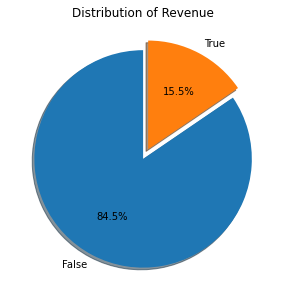

In [ ]:
# Plot the percentage of the distribution of revenue ( purchase )
size = df['Revenue'].value_counts()
labels = df['Revenue'].unique()
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(size, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Distribution of Revenue')


Text(0, 0.5, 'count')

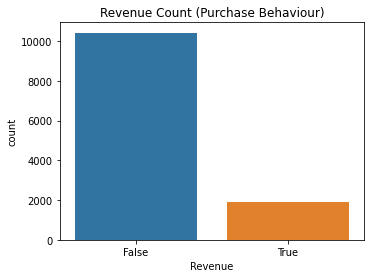

In [ ]:
plt.figure(figsize=(12,4))
# Visualizing the customers' total purchase behaviour : 
plt.subplot(1, 2, 1)
# countplot counts the frequency of an attribute
sns.countplot(df['Revenue'])
plt.title('Revenue Count (Purchase Behaviour)')
plt.xlabel('Revenue')
plt.ylabel('count')


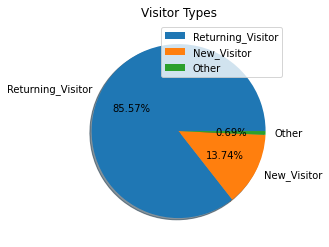

In [ ]:
# plotting a pie chart for the percentage of each visitor type(customer):
plt.figure(figsize=(12,4))
size = df['VisitorType'].value_counts()
labels = df['VisitorType'].unique()
plt.pie(size, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Visitor Types')
plt.legend()

Text(0.5, 1.0, 'Visits per Month')

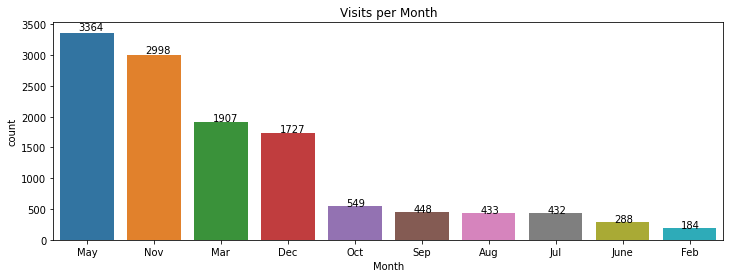

In [ ]:
# Visualizing the number of customers' visits(sessions) per month :
plt.figure(figsize=(12,4))
# countplot counts the frequency of an attribute
ax = sns.countplot(df["Month"], 
                   order = df["Month"].value_counts().index)
# Appending the values of each bar to the top 
for p, label in zip(ax.patches, df["Month"].value_counts()):
    ax.annotate(label, (p.get_x()+0.275, p.get_height()*1.01))
plt.title('Visits per Month')


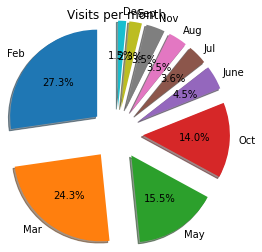

In [ ]:
# plotting a pie chart for the percentage of sessions per month
size = df['Month'].value_counts()
labels = df['Month'].unique()
#Since we have many labels, we will make a distance between each two slices to make it more readable
distance = 0.3
separate = (distance, distance, distance, distance, distance, distance , distance, distance, distance, distance)
plt.pie(size, labels = labels, shadow = True,explode=separate, autopct = '%.1f%%', startangle = 90)
plt.title('Visits per month')
plt.show()



Text(0.5, 1.0, 'SpecialDay Frequency ')

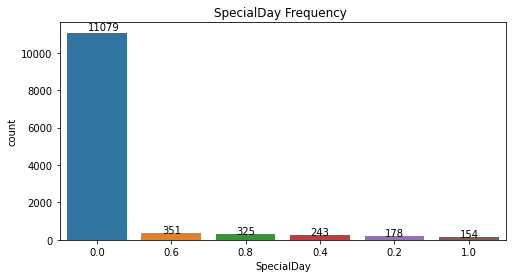

In [ ]:
# Visualizing the frequency of sessions during SpecialDays :
plt.figure(figsize=(8,4))
ax = sns.countplot(df["SpecialDay"], 
                   order = df["SpecialDay"].value_counts().index)

for p, label in zip(ax.patches, df["SpecialDay"].value_counts()):
    ax.annotate(label, (p.get_x()+0.275, p.get_height()*1.01))
plt.title('SpecialDay Frequency ')


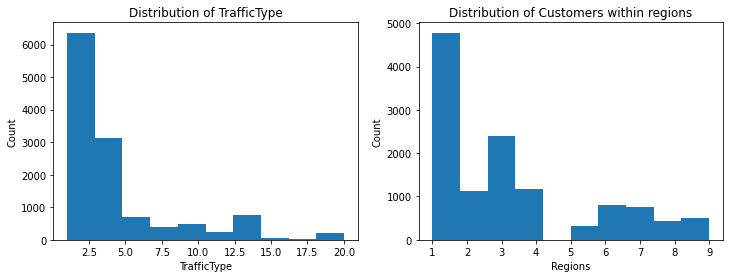

In [ ]:
# visualizing the frequency of traffic type
plt.rcParams['figure.figsize'] = (12, 4)

plt.subplot(1, 2, 1)
plt.hist(df['TrafficType'])
plt.title('Distribution of TrafficType')
plt.xlabel('TrafficType')
plt.ylabel('Count')

# visualizing the frequency of customers around Regions
plt.subplot(1, 2, 2)
plt.hist(df['Region'])
plt.title('Distribution of Customers within regions')
plt.xlabel('Regions')
plt.ylabel('Count')

plt.show()



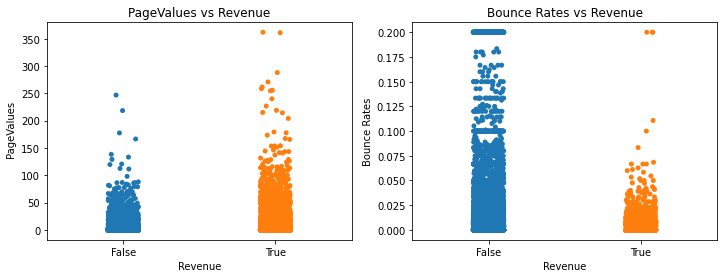

In [ ]:
# visualizing the relation between page values and revenue
plt.rcParams['figure.figsize'] = (12, 4)
plt.subplot(1, 2, 1)
sns.stripplot(df['Revenue'], df['PageValues'])
plt.title('PageValues vs Revenue')
plt.xlabel('Revenue')
plt.ylabel(' PageValues')

# visualizing the relation between bounce rate and revenue
plt.subplot(1, 2, 2)
sns.stripplot(df['Revenue'], df['BounceRates'])
plt.title('Bounce Rates vs Revenue')
plt.xlabel('Revenue')
plt.ylabel('Bounce Rates')

plt.show()


## Bivariate Analysis :

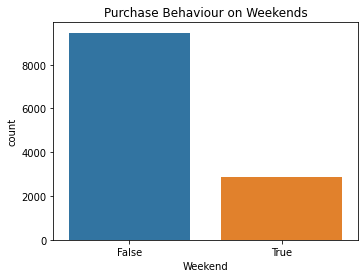

In [ ]:
# Visualizing the customers' purchase behaviour during weekends :
plt.subplot(1, 2, 2)
sns.countplot(df['Weekend'])
plt.title('Purchase Behaviour on Weekends')
plt.xlabel('Weekend')
plt.ylabel('count')

plt.show()

In [ ]:
df_WR = pd.crosstab(df['Weekend'], df['Revenue'])
df_WR['total']=df_WR[0]+df_WR[1]
df_WR['visitor_percent'] = (df_WR['total']/(df_WR['total'].sum()))
df_WR['purchase percent'] = (df_WR[True]/df_WR['total'])*100
df_WR

Revenue  False  True  total  visitor_percent  purchase percent
Weekend                                                       
False     8053  1409   9462         0.767397         14.891144
True      2369   499   2868         0.232603         17.398884

Text(0, 0.5, ' Revenue ')

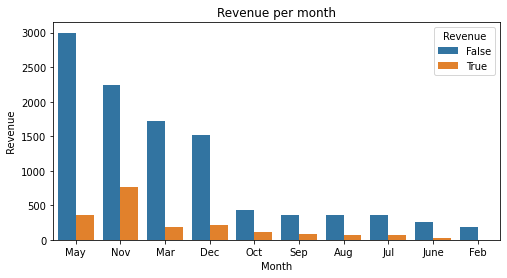

In [ ]:
# Visualizing the count of revenue or purchase per month
plt.figure(figsize=(8,4))
ax = sns.countplot(df["Month"],  hue = df['Revenue'],
                   order = df["Month"].value_counts().index)
plt.title('Revenue per month')
plt.xlabel('Month')
plt.ylabel(' Revenue ')

In [ ]:
df_MR = pd.crosstab(df['Month'], df['Revenue'])
df_MR['total']=df_MR[0]+df_MR[1]
df_MR['visitor_percent'] = (df_MR['total']/(df_MR['total'].sum()))
df_MR['purchase percent'] = (df_MR[True]/df_MR['total'])*100
df_MR

Revenue  False  True  total  visitor_percent  purchase percent
Month                                                         
Aug        357    76    433         0.035118         17.551963
Dec       1511   216   1727         0.140065         12.507238
Feb        181     3    184         0.014923          1.630435
Jul        366    66    432         0.035036         15.277778
June       259    29    288         0.023358         10.069444
Mar       1715   192   1907         0.154663         10.068170
May       2999   365   3364         0.272830         10.850178
Nov       2238   760   2998         0.243147         25.350233
Oct        434   115    549         0.044526         20.947177
Sep        362    86    448         0.036334         19.196429

Text(0, 0.5, ' Revenue ')

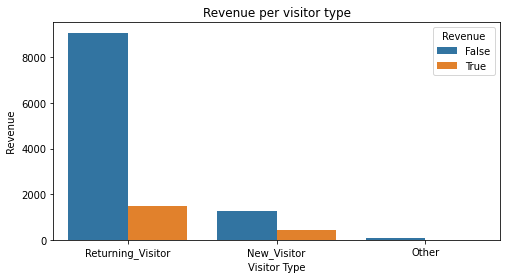

In [ ]:
# Visualizing the count of purchases ( Revenue ) made by different visitorTypes
plt.figure(figsize=(8,4))
sns.countplot(x='VisitorType', hue = 'Revenue',data = df)
plt.title('Revenue per visitor type')
plt.xlabel('Visitor Type')
plt.ylabel(' Revenue ')

In [ ]:
df_visitor = pd.crosstab(df['VisitorType'], df['Revenue'])
df_visitor['total']=df_visitor[0]+df_visitor[1]
df_visitor['visitor_percent'] = (df_visitor['total']/(df_visitor['total'].sum()))
df_visitor['purchase percent'] = (df_visitor[True]/df_visitor['total'])*100
df_visitor


Revenue            False  True  total  visitor_percent  purchase percent
VisitorType                                                             
New_Visitor         1272   422   1694         0.137388         24.911452
Other                 69    16     85         0.006894         18.823529
Returning_Visitor   9081  1470  10551         0.855718         13.932329

Text(0.5, 1.0, 'Revenue Frequency per SpecialDay ')

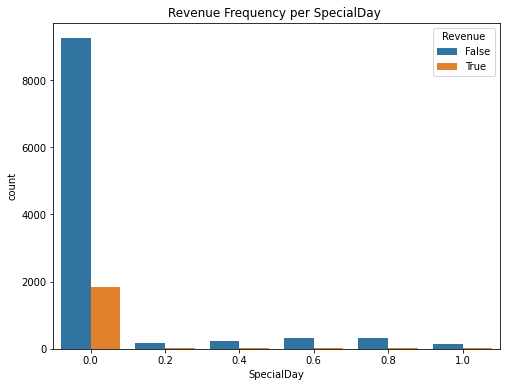

In [ ]:
# Visualize the count of purchases (Revenue) made during specialDays
fig, axarr = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(x='SpecialDay', hue = 'Revenue',data = df)
plt.title('Revenue Frequency per SpecialDay ')


In [ ]:
df_SdR = pd.crosstab(df['SpecialDay'], df['Revenue'])
df_SdR['total']=df_SdR[0]+df_SdR[1]
df_SdR['visitor_percent'] = (df_SdR['total']/(df_SdR['total'].sum()))
df_SdR['purchase percent'] = (df_SdR[True]/df_SdR['total'])*100

df_SdR

Revenue     False  True  total  visitor_percent  purchase percent
SpecialDay                                                       
0.0          9248  1831  11079         0.898540         16.526762
0.2           164    14    178         0.014436          7.865169
0.4           230    13    243         0.019708          5.349794
0.6           322    29    351         0.028467          8.262108
0.8           314    11    325         0.026358          3.384615
1.0           144    10    154         0.012490          6.493506

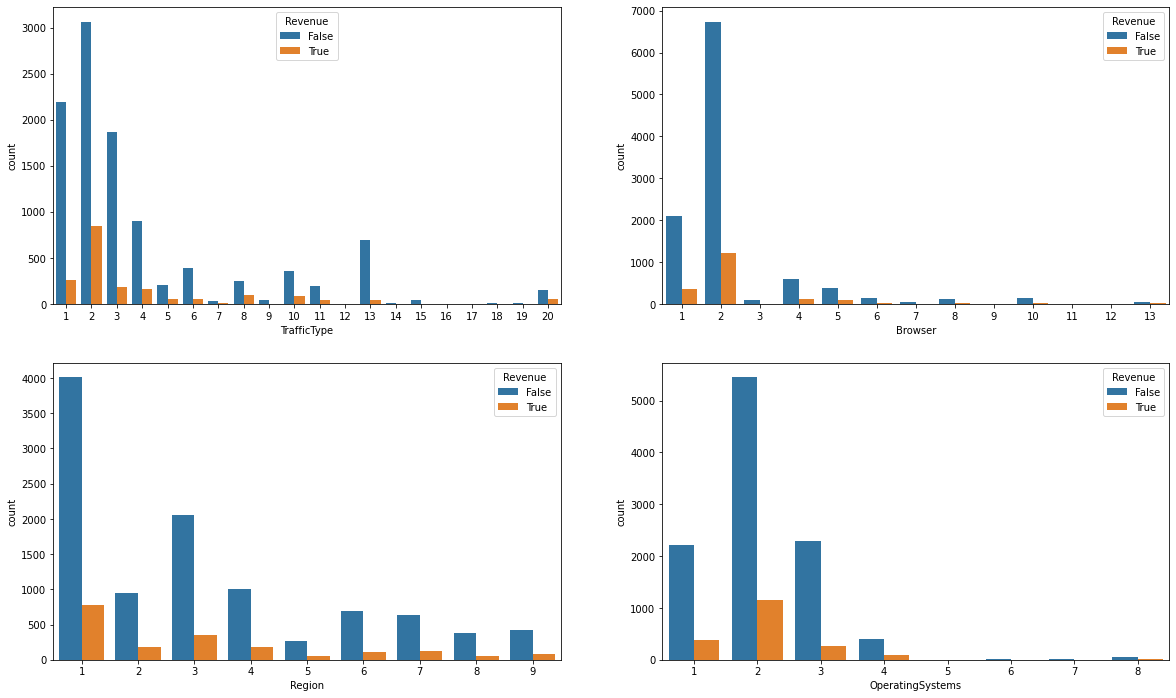

In [ ]:
# Visualize the relation between revenue and other categorical variables 
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='TrafficType', hue = 'Revenue',data = df, ax=axarr[0][0])
sns.countplot(x='Browser', hue = 'Revenue',data = df, ax=axarr[0][1])
sns.countplot(x='Region', hue = 'Revenue',data = df, ax=axarr[1][0])
sns.countplot(x='OperatingSystems', hue = 'Revenue',data = df, ax=axarr[1][1])


#### We note the following:
<br>

* More revenue is generated in weekdays in general value. However,
* 76.7% of our visitors visit during weekdays  ( a five-day period ) with 14.9% probability of making purchase
* 23.3% of visitors on weekends, (a two-day period ) with  a 17.4% probability of making purchase.
<br>

* Customers’ visits per month :<br>
* highest :  May  with   3364      visits in the year  with a ( 27.3% ) <br>
* Lowest :   Feb with     184        visits in the year with a ( 1.5%   ) <br>
<br>

* Customers’ Revenue per month :
* We notice high shopping rates in September, October, and November; and this might be caused by seasonality.
* November tends to be the month with the highest revenue

<br>

* Special Day VS Revenue:
* Most purchases has been completed without being close to a special day  
<br>

* Visitor Types :
* The Majority of the revenue as a total value is generated from Returning_visitors
* Most visitors are returning visitors ( 85.6% ) compared to ( 13.7% ) new visitors
* However, New visitors have a higher probability of making a purchase with ( 24.9% ) compared to only ( 13.9% ) of returning visitors generating revenue.
<br>

* General :
* Lots of variation in revenue with the type of traffic the website is getting.
* Very little variation by region
* Browser 12 and 13 show high conversions, Every other browser preforms almost similarly
* OS type 8 stands out although it doesn’t comprise the majority of customers


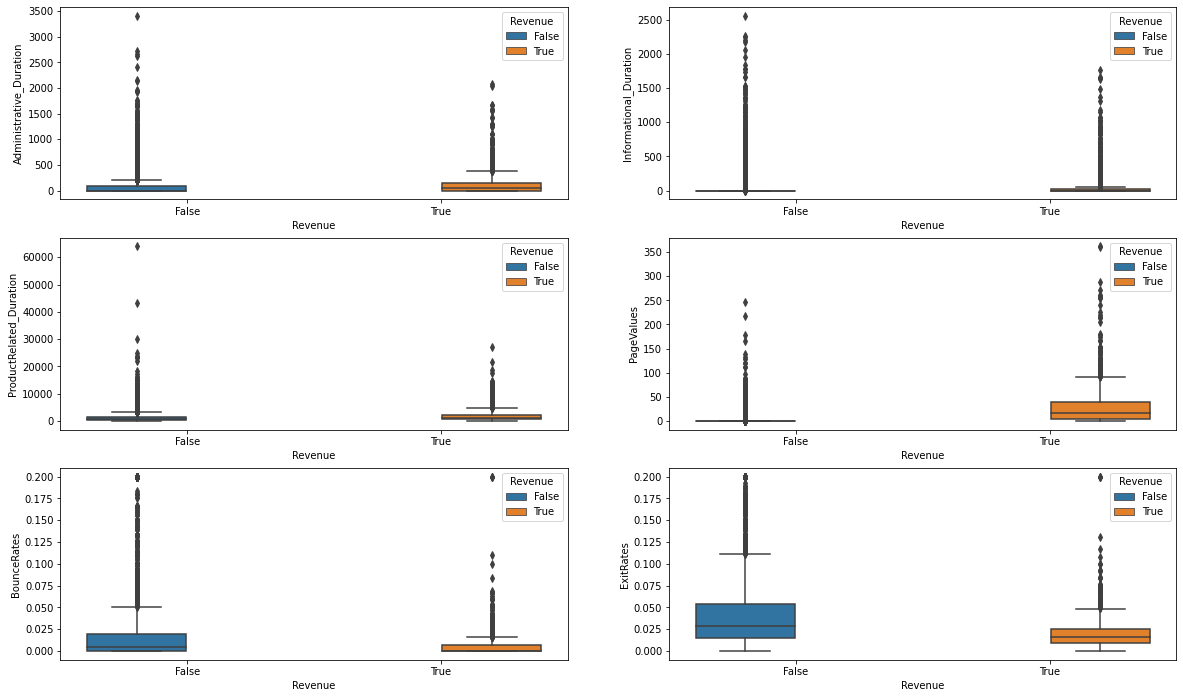

In [ ]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='Administrative_Duration',x = 'Revenue', hue = 'Revenue',data = df, ax=axarr[0][0])
sns.boxplot(y='Informational_Duration',x = 'Revenue', hue = 'Revenue',data = df, ax=axarr[0][1])
sns.boxplot(y='ProductRelated_Duration',x = 'Revenue', hue = 'Revenue',data = df, ax=axarr[1][0])
sns.boxplot(y='PageValues',x = 'Revenue', hue = 'Revenue',data = df, ax=axarr[1][1])
sns.boxplot(y='BounceRates',x = 'Revenue', hue = 'Revenue',data = df, ax=axarr[2][0])
sns.boxplot(y='ExitRates',x = 'Revenue', hue = 'Revenue',data = df, ax=axarr[2][1])


## Correlation Analysis 

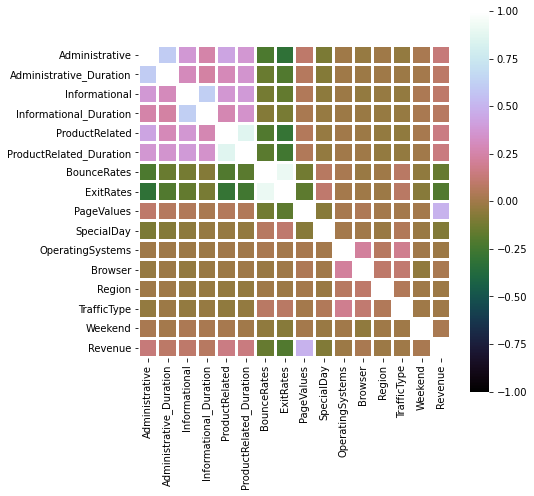

In [ ]:
corrMap = df.corr()
plt.figure(figsize=(7, 7))
sns.heatmap(corrMap, vmax=1, vmin=-1 ,center=0,
            square=True, linewidths=2, cmap="cubehelix")
plt.show()

In [ ]:
df.corr()

Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601583   
Administrative_Duration        0.601583                 1.000000   
Informational                  0.376850                 0.302710   
Informational_Duration         0.255848                 0.238031   
ProductRelated                 0.431119                 0.289087   
ProductRelated_Duration        0.373939                 0.355422   
BounceRates                   -0.223563                -0.144170   
ExitRates                     -0.316483                -0.205798   
PageValues                     0.098990                 0.067608   
SpecialDay                    -0.094778                -0.073304   
OperatingSystems              -0.006347                -0.007343   
Browser                       -0.025035                -0.015392   
Region                        -0.005487                -0.005561   
TrafficType                   -0.033561                -0.014376   
Weekend                        0.026417                 0.014990   
Revenue                        0.138917                 0.093587   

                         Informational  Informational_Duration  \
Administrative                0.376850                0.255848   
Administrative_Duration       0.302710                0.238031   
Informational                 1.000000                0.618955   
Informational_Duration        0.618955                1.000000   
ProductRelated                0.374164                0.280046   
ProductRelated_Duration       0.387505                0.347364   
BounceRates                  -0.116114               -0.074067   
ExitRates                    -0.163666               -0.105276   
PageValues                    0.048632                0.030861   
SpecialDay                   -0.048219               -0.030577   
OperatingSystems             -0.009527               -0.009579   
Browser                      -0.038235               -0.019285   
Region                       -0.029169               -0.027144   
TrafficType                  -0.034491               -0.024675   
Weekend                       0.035785                0.024078   
Revenue                       0.095200                0.070345   

                         ProductRelated  ProductRelated_Duration  BounceRates  \
Administrative                 0.431119                 0.373939    -0.223563   
Administrative_Duration        0.289087                 0.355422    -0.144170   
Informational                  0.374164                 0.387505    -0.116114   
Informational_Duration         0.280046                 0.347364    -0.074067   
ProductRelated                 1.000000                 0.860927    -0.204578   
ProductRelated_Duration        0.860927                 1.000000    -0.184541   
BounceRates                   -0.204578                -0.184541     1.000000   
ExitRates                     -0.292526                -0.251984     0.913004   
PageValues                     0.056282                 0.052823    -0.119386   
SpecialDay                    -0.023958                -0.036380     0.072702   
OperatingSystems               0.004290                 0.002976     0.023823   
Browser                       -0.013146                -0.007380    -0.015772   
Region                        -0.038122                -0.033091    -0.006485   
TrafficType                   -0.043064                -0.036377     0.078286   
Weekend                        0.016092                 0.007311    -0.046514   
Revenue                        0.158538                 0.152373    -0.150673   

                         ExitRates  PageValues  SpecialDay  OperatingSystems  \
Administrative           -0.316483    0.098990   -0.094778         -0.006347   
Administrative_Duration  -0.205798    0.067608   -0.073304         -0.007343   
Informational            -0.163666    0.048632   -0.048219         -0.009527   
Informational_Duration   -0.105276    0.030861 

#### From the above correlation analysis we find that :

1- Exit rate is highly correlated with BounceRate <br>
2- Page values and Revenue are correlated. Page Value has the highest correlation for the attribute Revenue <Br>
3- Administrative and Administrative_Duration are highly correlated <br>
4- ProductRelated and ProductRelated_Duration are highly correlated <br>
5- Informational and Informational_Duration are highly correlated. <br>
6- SpecialDay, OperatingSystems , Browser , Region , TrafficType , and Weekend has no or weak and likely unimportant correlation with other attributes and most importantly the target. So no attribute has an influence on the other.


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:100: UserWarning: The handle <matplotlib.patches.Patch object at 0x7f04802886d8> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self.fig.legend(handles, labels, **kwargs)


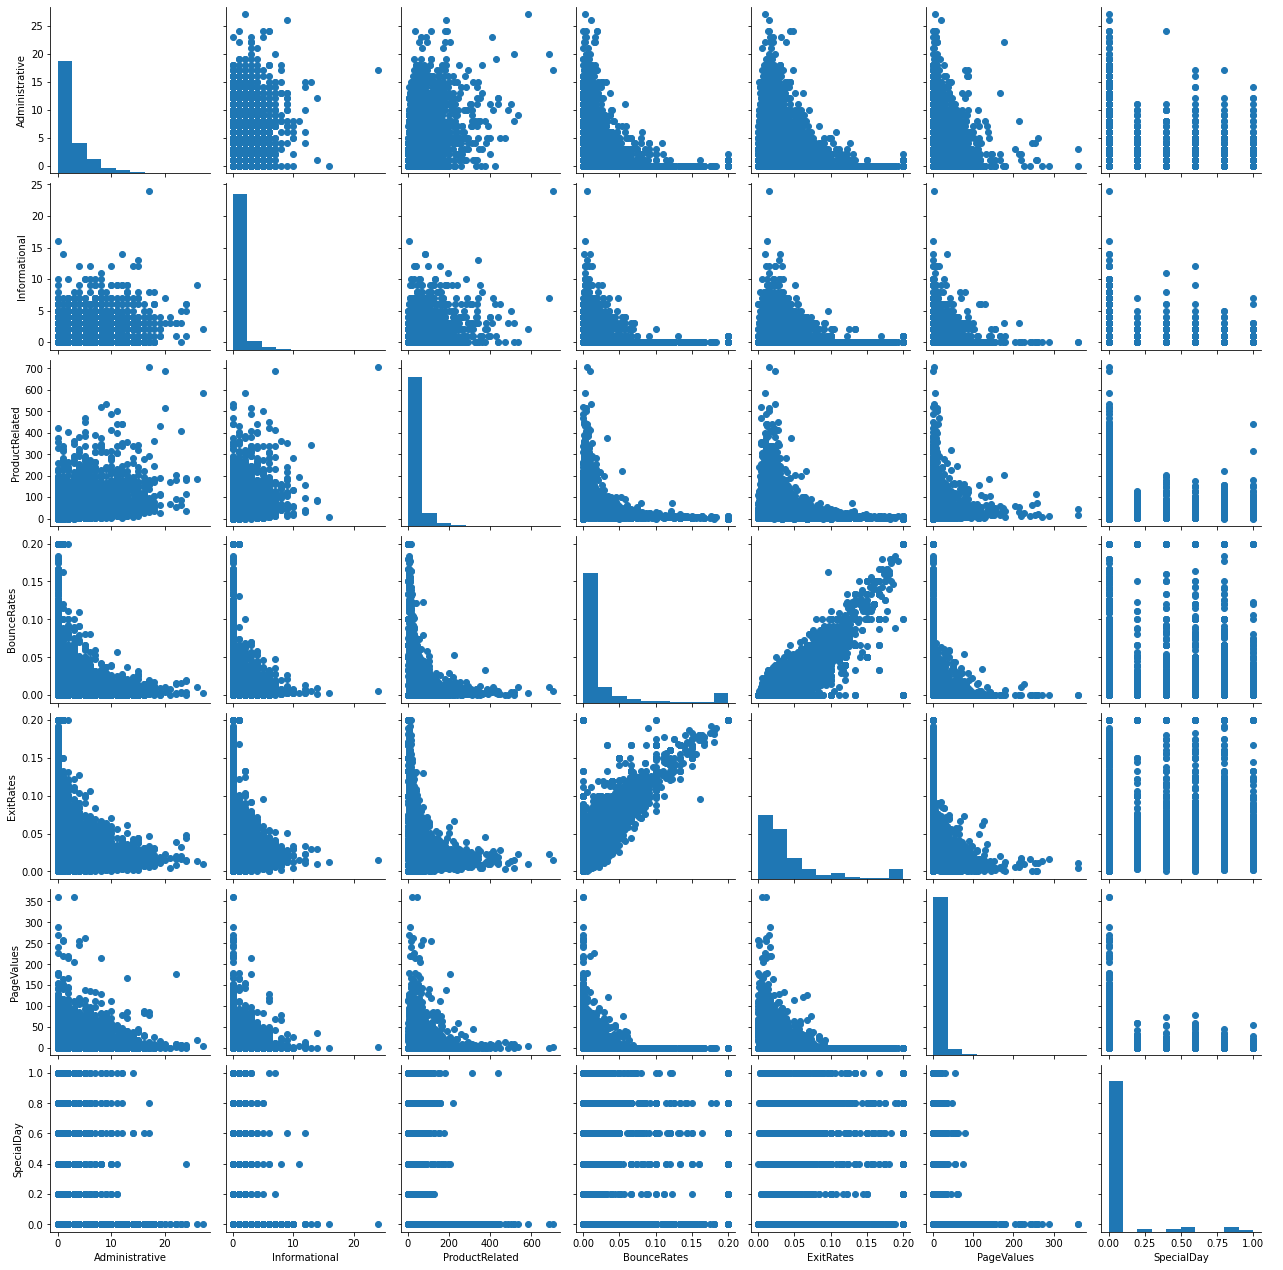

In [ ]:
# Visualize the relationship between features : 
df_attr = df.iloc[:, [0,2,4,6,7,8,9,10,15]]
pg = sns.PairGrid(df_attr)
pg.map_diag(plt.hist)
pg.map_offdiag(plt.scatter)
pg.add_legend()
axes = pg.axes

## TSNE and PCA : 

Transforming categorical columns into new variables using dummies and One shot encoding on Revenue and Weekend variable

In [ ]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df.loc[:,['Weekend', 'Revenue']] = \
df.loc[:,['Weekend', 'Revenue']].apply(enc.fit_transform)

import pandas as pd
df=pd.get_dummies(data=df, columns=['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType'])


In [ ]:
# Checking the label encoded dataset
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Weekend  Revenue  \
0         0.20       0.20         0.0         0.0        0        0   
1         0.00       0.10         0.0         0.0        0        0   
2         0.20       0.20         0.0         0.0        0        0   
3         0.05       0.14         0.0         0.0        0        0   
4         0.02       0.05         0.0         0.0        1        0   

   Month_Aug  Month_Dec  Month_Feb  Month_Jul  Month_June  Month_Mar  \
0          0          0          1          0           0          0   
1          0          0          1          0           0          0   
2          0          0          1          0           0          0   
3          0          0          1          0           0          0   
4          0          0          1          0           0          0   

   Month_May  Month_Nov  Month_Oct  Month_Sep  OperatingSystems_1  \
0          0          0          0          0                   1   
1          0          0          0          0                   0   
2          0          0          0          0                   0   
3          0          0          0          0                   0   
4          0          0          0          0                   0   

   OperatingSystems_2  OperatingSystems_3  OperatingSystems_4  \
0                   0                   0                   0   
1                   1                   0                   0   
2                   0                   0                   1   
3                   0                   1                   0   
4                   0                   1                   0   

   OperatingSystems_5  OperatingSystems_6  OperatingSystems_7  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   OperatingSystems_8  Browser_1  Browser_2  Browser_3  Browser_4  Browser_5  \
0                   0          1          0          0          0          0   
1                   0          0          1          0          0          0   
2                   0          1          0          0          0          0   
3                   0          0          1          0          0          0   
4                   0          0          0          1          0          0   

   Browser_6  Browser_7  Browser_8  Browser_9  Browser_10  Browser_11  \
0          0          0          0          0           0           0   
1          0          0          0          0           0           0   
2          0          0          0          0           0           0   
3          0          0          0          0           0           0   
4          0          0          0          0           0           0   

   Browser_12  Browser_13  Region_1  Region_2  Region_3  Region_4  Region_5  \
0           0           0         1         0         0         0         0   
1           0           0         1         0         0         0         0   
2

The above dataset is the final dataset that can be used for modelling. The categorical columns are converted into dummies.

In [ ]:
# Checking the label encoded y label
df.Revenue.value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [ ]:
# Passing the cleaned dataset to a new variable
new_file = df
new_file.shape

(12330, 75)

In [ ]:
'''
For handling the imbalance dataset there are different techniques.
1. Under sampling
2. Over sampling
3. Synthetic Minority Over Sampling (SMOTE)

I followed the below youtube video link which clearly explains the difference with practical way to sample the dataset and also explains by applying
model on the imbalanced data set and then balanced dataset. I highly recommend waching this video.

https://www.youtube.com/watch?v=dkXB8HH_4-k

Before balancing the y label, I will have to encode the labels and convert them from string to numerical categorical data.
'''

'\nFor handling the imbalance dataset there are different techniques.\n1. Under sampling\n2. Over sampling\n3. Synthetic Minority Over Sampling (SMOTE)\n\nI followed the below youtube video link which clearly explains the difference with practical way to sample the dataset and also explains by applying\nmodel on the imbalanced data set and then balanced dataset. I highly recommend waching this video.\n\nhttps://www.youtube.com/watch?v=dkXB8HH_4-k\n\nBefore balancing the y label, I will have to encode the labels and convert them from string to numerical categorical data.\n'

In [ ]:
# Seperating Features and assigning it to variable X
X = new_file.drop(['Revenue'],axis=1)
X.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Weekend  Month_Aug  \
0         0.20       0.20         0.0         0.0        0          0   
1         0.00       0.10         0.0         0.0        0          0   
2         0.20       0.20         0.0         0.0        0          0   
3         0.05       0.14         0.0         0.0        0          0   
4         0.02       0.05         0.0         0.0        1          0   

   Month_Dec  Month_Feb  Month_Jul  Month_June  Month_Mar  Month_May  \
0          0          1          0           0          0          0   
1          0          1          0           0          0          0   
2          0          1          0           0          0          0   
3          0          1          0           0          0          0   
4          0          1          0           0          0          0   

   Month_Nov  Month_Oct  Month_Sep  OperatingSystems_1  OperatingSystems_2  \
0          0          0          0                   1                   0   
1          0          0          0                   0                   1   
2          0          0          0                   0                   0   
3          0          0          0                   0                   0   
4          0          0          0                   0                   0   

   OperatingSystems_3  OperatingSystems_4  OperatingSystems_5  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   1                   0   
3                   1                   0                   0   
4                   1                   0                   0   

   OperatingSystems_6  OperatingSystems_7  OperatingSystems_8  Browser_1  \
0                   0                   0                   0          1   
1                   0                   0                   0          0   
2                   0                   0                   0          1   
3                   0                   0                   0          0   
4                   0                   0                   0          0   

   Browser_2  Browser_3  Browser_4  Browser_5  Browser_6  Browser_7  \
0          0          0          0          0          0          0   
1          1          0          0          0          0          0   
2          0          0          0          0          0          0   
3          1          0          0          0          0          0   
4          0          1          0          0          0          0   

   Browser_8  Browser_9  Browser_10  Browser_11  Browser_12  Browser_13  \
0          0          0           0           0           0           0   
1          0          0           0           0           0           0   
2          0          0           0           0           0           0   
3          0          0           0           0           0           0   
4          0          0           0           0           0           0   

   Region_1  Region_2  Region_3  Region_4  Region_5  Region_6  Region_7  \
0         1         0         0         0         0         0         0  

In [ ]:
X.shape

(12330, 74)

### TSNE

In [ ]:
x_value = X.iloc[:,list(range(74))].values
x_value

array([[ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 4., 75.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.]])

In [ ]:
revenue = new_file['Revenue'].astype('category').cat.codes
revenue

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       0
46       0
47       0
48       0
49       0
50       0
51       0
52       0
53       0
54       0
55       0
56       0
57       0
58       0
59       0
60       0
61       0
62       0
63       0
64       0
65       1
66       0
67       0
68       0
69       0
70       0
71       0
72       0
73       0
74       0
75       0
76       1
77       0
78       0
79       0
80       0
81       0
82       0
83       0
84       0
85       0
86       0
87       0
88       0
89       0
90       0

In [ ]:
# TSNE 
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_x = normalize(x_value)

# Import TSNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, verbose=1, perplexity=30, n_iter=1000, learning_rate=100)
tsne_results = tsne.fit_transform(normalized_x)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12330 samples in 0.142s...
[t-SNE] Computed neighbors for 12330 samples in 3.977s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12330
[t-SNE] Computed conditional probabilities for sample 2000 / 12330
[t-SNE] Computed conditional probabilities for sample 3000 / 12330
[t-SNE] Computed conditional probabilities for sample 4000 / 12330
[t-SNE] Computed conditional probabilities for sample 5000 / 12330
[t-SNE] Computed conditional probabilities for sample 6000 / 12330
[t-SNE] Computed conditional probabilities for sample 7000 / 12330
[t-SNE] Computed conditional probabilities for sample 8000 / 12330
[t-SNE] Computed conditional probabilities for sample 9000 / 12330
[t-SNE] Computed conditional probabilities for sample 10000 / 12330
[t-SNE] Computed conditional probabilities for sample 11000 / 12330
[t-SNE] Computed conditional probabilities for sample 12000 / 12330
[t-SNE] Computed conditional probabilities for sam

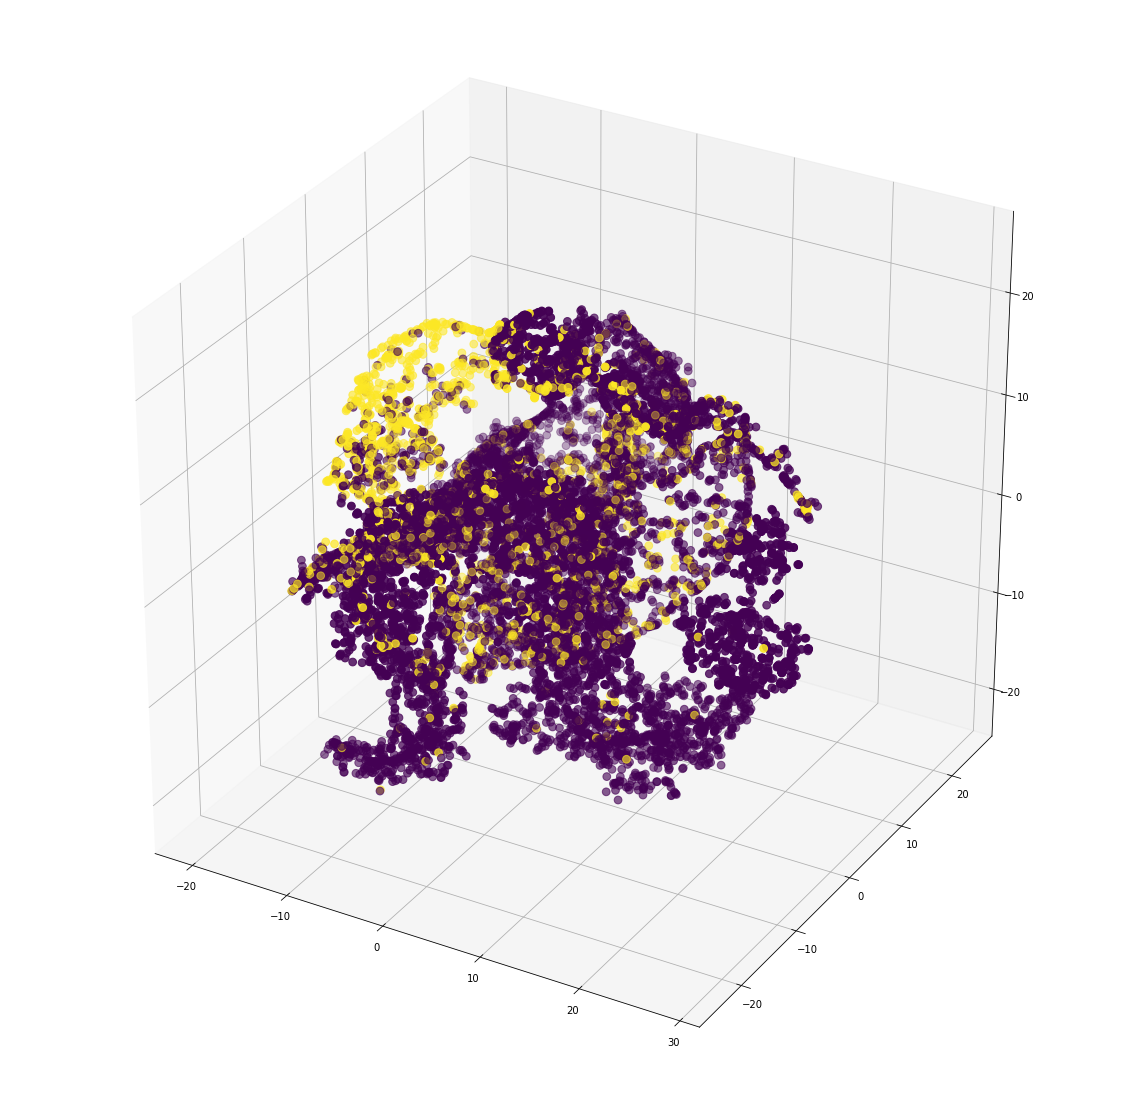

In [ ]:
# 3D TSNE plot
y_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2', 'comp3'])
y_tsne['label'] = revenue

fig1 = plt.figure(figsize=(20,20))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(y_tsne['comp1'], y_tsne['comp2'], y_tsne['comp3'], c=y_tsne['label'], s=60)
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12330 samples in 0.143s...
[t-SNE] Computed neighbors for 12330 samples in 4.032s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12330
[t-SNE] Computed conditional probabilities for sample 2000 / 12330
[t-SNE] Computed conditional probabilities for sample 3000 / 12330
[t-SNE] Computed conditional probabilities for sample 4000 / 12330
[t-SNE] Computed conditional probabilities for sample 5000 / 12330
[t-SNE] Computed conditional probabilities for sample 6000 / 12330
[t-SNE] Computed conditional probabilities for sample 7000 / 12330
[t-SNE] Computed conditional probabilities for sample 8000 / 12330
[t-SNE] Computed conditional probabilities for sample 9000 / 12330
[t-SNE] Computed conditional probabilities for sample 10000 / 12330
[t-SNE] Computed conditional probabilities for sample 11000 / 12330
[t-SNE] Computed conditional probabilities for sample 12000 / 12330
[t-SNE] Computed conditional probabilities for sam

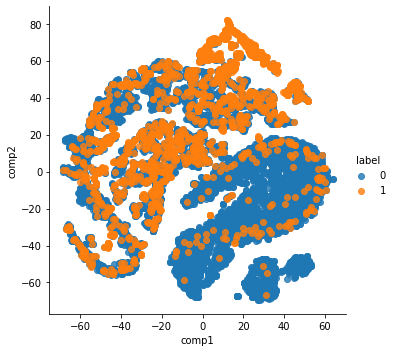

In [ ]:
# using seaborn package to plot  2D tsne

import seaborn as sns
import matplotlib.pyplot as plt  
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_x = normalize(x_value)

# Import TSNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=100)
tsne_results = tsne.fit_transform(normalized_x)

y_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
y_tsne['label'] = revenue
sns.lmplot(x='comp1', y='comp2', data=y_tsne, hue='label', fit_reg=False)

## PCA

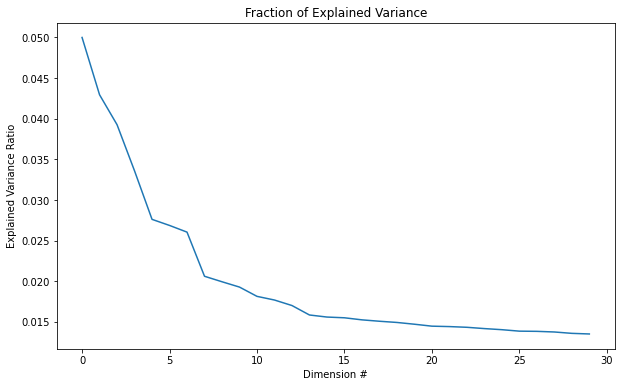

In [ ]:
# standardize data
stscaler = StandardScaler().fit(X)
scaled_x = stscaler.transform(X)

# fit pca model
pca = PCA(n_components=30)   
pca.fit(scaled_x)

# plot variance
fig, ax = plt.subplots(figsize=(10,6))

# Decorate the plot
ax.set_xlabel('Dimension #')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('Fraction of Explained Variance')
ax.plot(pca.explained_variance_ratio_)  

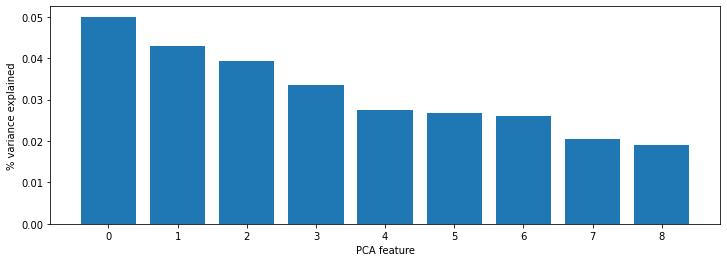

In [ ]:
# standardize data
stscaler = StandardScaler().fit(X)
scaled_x = stscaler.transform(X)

# fit pca model
pca = PCA(n_components=9)   
pca.fit(scaled_x)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('% variance explained')
plt.xticks(features)
plt.show()

In [ ]:
# We can print out rotation matrix and variance associated with each
# projected dimension

vars = pca.explained_variance_ratio_
c_names = list(X.columns)

print('Variance:  Projected dimension')
print('------------------------------')
for idx, row in enumerate(pca.components_):
    output = '{0:4.1f}%:    '.format(100.0 * vars[idx])
    output += " + ".join("{0:5.2f} * {1:s}".format(val, name) \
                      for val, name in zip(row, c_names))
    print(output)

Variance:  Projected dimension
------------------------------
 5.0%:     0.34 * Administrative +  0.28 * Administrative_Duration +  0.30 * Informational +  0.25 * Informational_Duration +  0.37 * ProductRelated +  0.37 * ProductRelated_Duration + -0.28 * BounceRates + -0.32 * ExitRates +  0.10 * PageValues + -0.09 * SpecialDay +  0.02 * Weekend +  0.02 * Month_Aug +  0.00 * Month_Dec + -0.07 * Month_Feb + -0.00 * Month_Jul + -0.01 * Month_June + -0.04 * Month_Mar + -0.09 * Month_May +  0.11 * Month_Nov +  0.04 * Month_Oct +  0.03 * Month_Sep + -0.13 * OperatingSystems_1 +  0.15 * OperatingSystems_2 + -0.03 * OperatingSystems_3 + -0.01 * OperatingSystems_4 + -0.01 * OperatingSystems_5 + -0.00 * OperatingSystems_6 + -0.01 * OperatingSystems_7 + -0.05 * OperatingSystems_8 + -0.13 * Browser_1 +  0.13 * Browser_2 + -0.03 * Browser_3 +  0.00 * Browser_4 +  0.00 * Browser_5 + -0.00 * Browser_6 + -0.00 * Browser_7 + -0.04 * Browser_8 + -0.00 * Browser_9 +  0.01 * Browser_10 + -0.01 * Browser_1

In [ ]:
#Removing the features that aren't correlated with the target variable

In [ ]:
X_copy = X[['Administrative',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'VisitorType_New_Visitor',
 'VisitorType_Other',
 'VisitorType_Returning_Visitor']]
X_copy.head()

Administrative  ProductRelated  ProductRelated_Duration  BounceRates  \
0               0               1                 0.000000         0.20   
1               0               2                64.000000         0.00   
2               0               1                 0.000000         0.20   
3               0               2                 2.666667         0.05   
4               0              10               627.500000         0.02   

   ExitRates  PageValues  VisitorType_New_Visitor  VisitorType_Other  \
0       0.20         0.0                        0                  0   
1       0.10         0.0                        0                  0   
2       0.20         0.0                        0                  0   
3       0.14         0.0                        0                  0   
4       0.05         0.0                        0                  0   

   VisitorType_Returning_Visitor  
0                              1  
1                              1  
2                              1  
3                              1  
4                              1

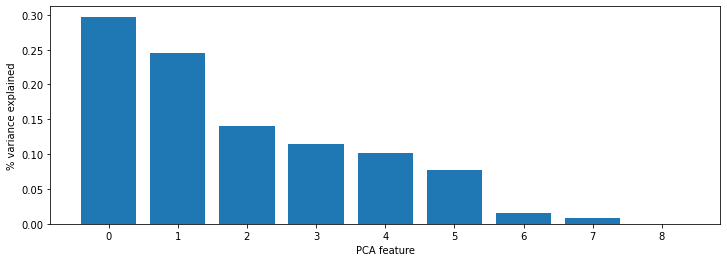

In [ ]:
# standardize data
stscaler = StandardScaler().fit(X_copy)
scaled_x = stscaler.transform(X_copy)

# fit pca model
pca = PCA(n_components=9)   
pca.fit(scaled_x)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('% variance explained')
plt.xticks(features)
plt.show()

In [ ]:
reduced_X=pca.fit_transform(scaled_x)
reduced_X=reduced_X[:,[0,1,2,3,4,5]]
reduced_X[1]

array([-1.30116003,  0.24622689, -0.59008718, -0.02852238, -0.1656984 ,
        0.18477799])

## Clustering : 

## K-means clustering

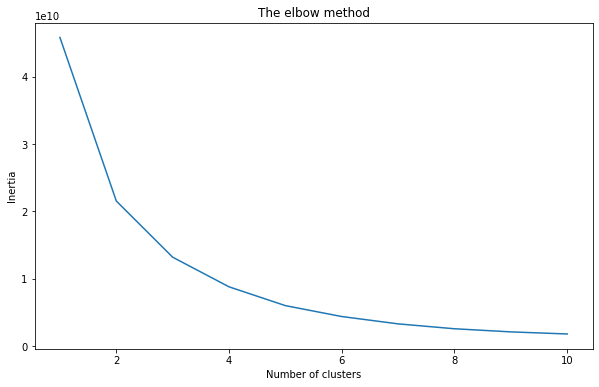

In [ ]:
X_copy = X.values
##Plotting inertia
inertia=[]
x_axis=range(1,11)

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = check_random_state(0))
    kmeans.fit(X_copy)
    inertia.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('The elbow method')
ax.set_ylabel('Inertia')
ax.set_xlabel('Number of clusters')
plt.plot(x_axis, inertia)


In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_copy)

In [ ]:
# function to get unique values 
def unique(list1): 
    x = np.array(y_kmeans) 
    print(np.unique(y_kmeans))

unique(y_kmeans)

[0 1 2 3]


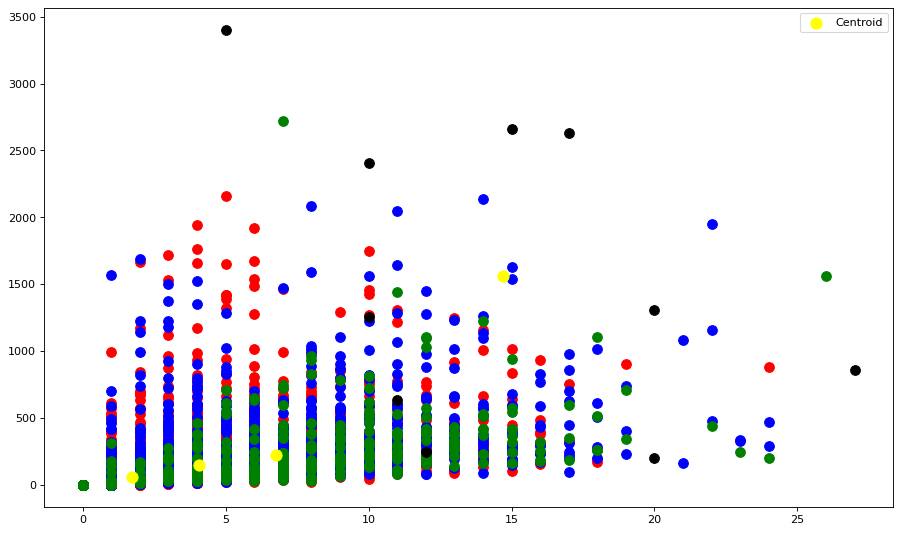

In [ ]:
figure(num=None, figsize=(13.7, 8.27), dpi=80, facecolor='w', edgecolor='k')

#Visualising the clusters
plt.scatter(X_copy[y_kmeans == 0, 0], X_copy[y_kmeans == 0, 1], s = 75, 
            c = 'red')
plt.scatter(X_copy[y_kmeans == 1, 0], X_copy[y_kmeans == 1, 1], s = 75, 
            c = 'blue')
plt.scatter(X_copy[y_kmeans == 2, 0], X_copy[y_kmeans == 2, 1], s = 75, 
            c = 'green')
plt.scatter(X_copy[y_kmeans == 3, 0], X_copy[y_kmeans == 3, 1], s = 75, 
            c = 'black')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], s = 100, 
            c = 'yellow', label = 'Centroid')

plt.legend()

In [ ]:
# TSNE 
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

tsne = TSNE(n_components=3, verbose=1, perplexity=30, n_iter=1000, learning_rate=100)
tsne_results = tsne.fit_transform(X_copy)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12330 samples in 0.155s...
[t-SNE] Computed neighbors for 12330 samples in 2.480s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12330
[t-SNE] Computed conditional probabilities for sample 2000 / 12330
[t-SNE] Computed conditional probabilities for sample 3000 / 12330
[t-SNE] Computed conditional probabilities for sample 4000 / 12330
[t-SNE] Computed conditional probabilities for sample 5000 / 12330
[t-SNE] Computed conditional probabilities for sample 6000 / 12330
[t-SNE] Computed conditional probabilities for sample 7000 / 12330
[t-SNE] Computed conditional probabilities for sample 8000 / 12330
[t-SNE] Computed conditional probabilities for sample 9000 / 12330
[t-SNE] Computed conditional probabilities for sample 10000 / 12330
[t-SNE] Computed conditional probabilities for sample 11000 / 12330
[t-SNE] Computed conditional probabilities for sample 12000 / 12330
[t-SNE] Computed conditional probabilities for sam

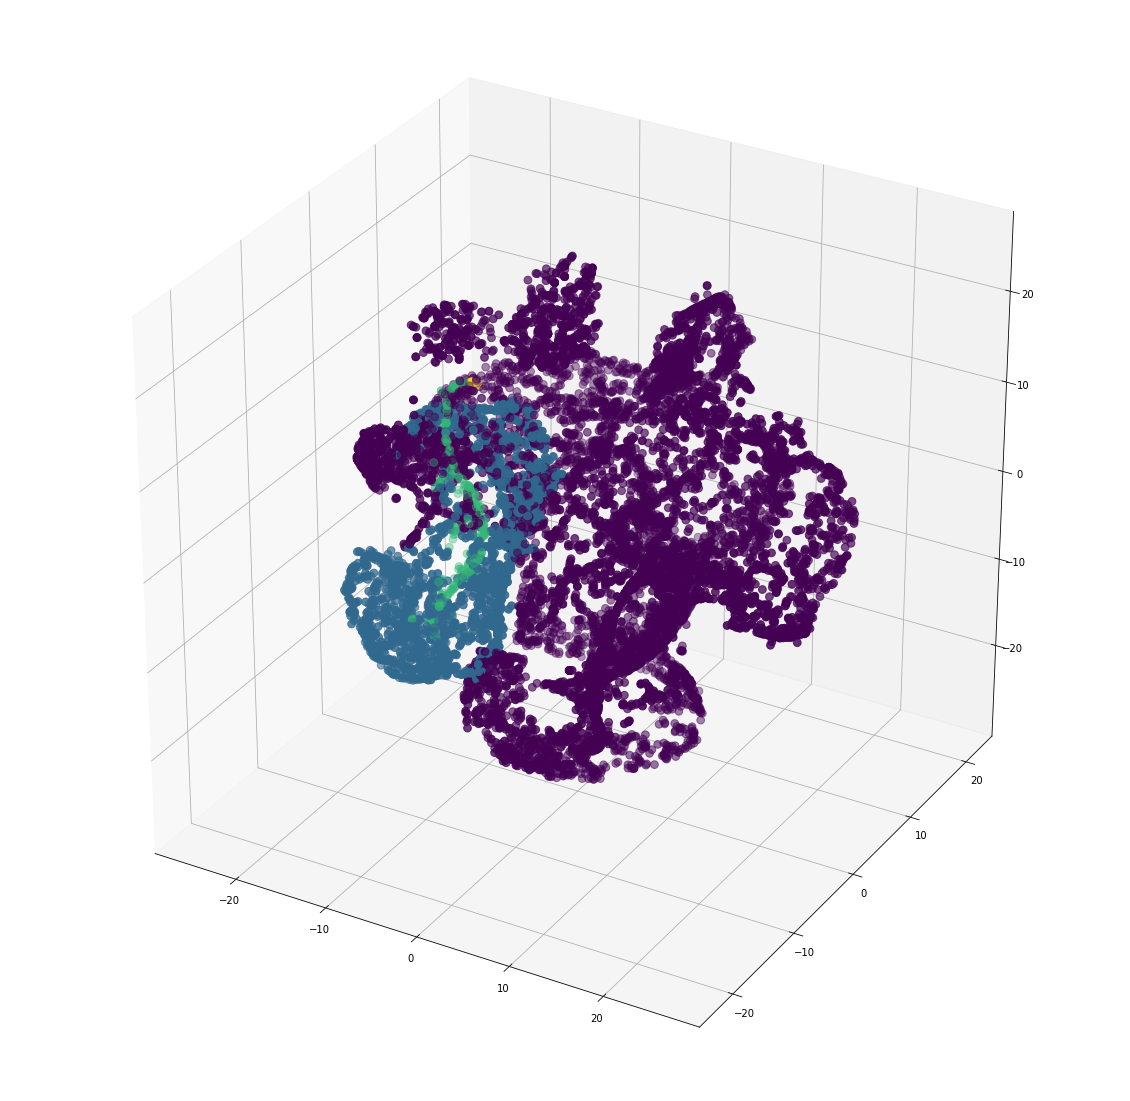

In [ ]:
# 3D TSNE plot
kmeans_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2', 'comp3'])
kmeans_tsne['label'] = y_kmeans

fig1 = plt.figure(figsize=(20,20))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(kmeans_tsne['comp1'], kmeans_tsne['comp2'], kmeans_tsne['comp3'], c=kmeans_tsne['label'], s=60)
plt.show()

As there isn't significant distinction between the clusters, we've decided to cluster the data post reducing the feature set using **Principal Component Analysis**



 Clustering using the reduced principal components

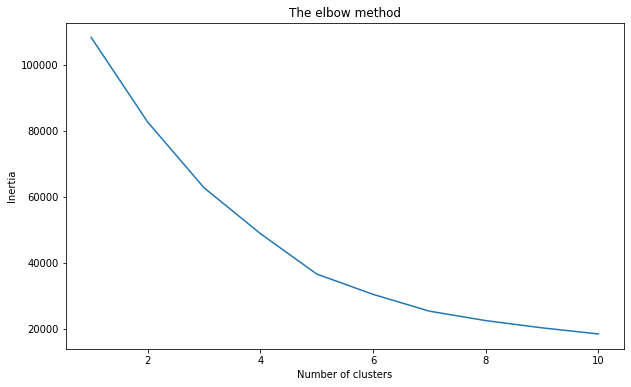

In [ ]:
X_copy = X.values
##Plotting inertia
inertia=[]
x_axis=range(1,11)

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = check_random_state(0))
    kmeans.fit(reduced_X)
    inertia.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('The elbow method')
ax.set_ylabel('Inertia')
ax.set_xlabel('Number of clusters')
plt.plot(x_axis, inertia)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(reduced_X)

In [ ]:
#Combining the dataset with the cluster labels
labels_df = pd.DataFrame(y_kmeans)
labels_df.columns = ['Cluster_Number']
labels_df['Cluster_Number'].unique()


final_file=pd.concat([df_copy, labels_df], axis=1, ignore_index=True)
final_file.columns = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue','Cluster_Number']
final_file.head()

#Writing the k-means label data to define the personas of the shoppers
final_file.to_csv("/content/drive/Shared drives/Data Mining Project/Final_file_kmeans.csv")

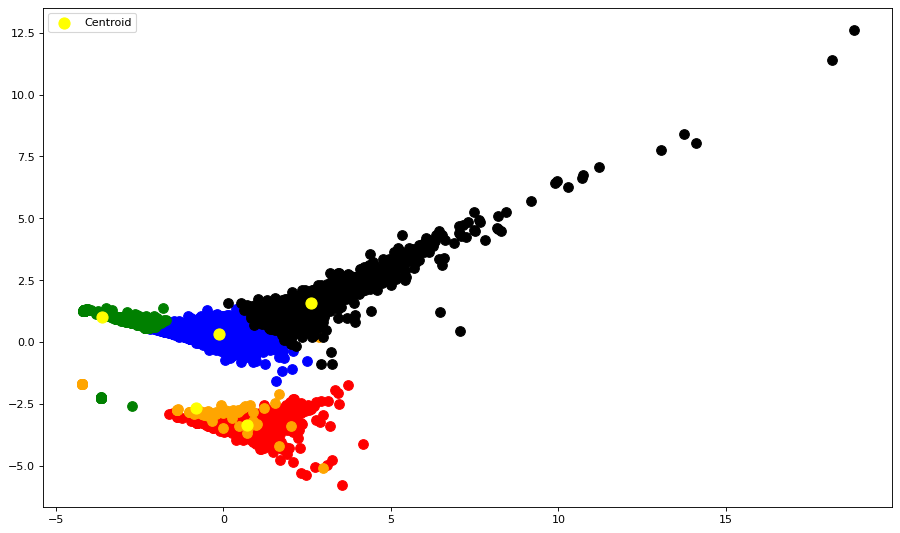

In [ ]:
 figure(num=None, figsize=(13.7, 8.27), dpi=80, facecolor='w', edgecolor='k')

#Visualising the clusters
plt.scatter(reduced_X[y_kmeans == 0, 0], reduced_X[y_kmeans == 0, 1], s = 75, 
            c = 'red')
plt.scatter(reduced_X[y_kmeans == 1, 0], reduced_X[y_kmeans == 1, 1], s = 75, 
            c = 'blue')
plt.scatter(reduced_X[y_kmeans == 2, 0], reduced_X[y_kmeans == 2, 1], s = 75, 
            c = 'green')
plt.scatter(reduced_X[y_kmeans == 3, 0], reduced_X[y_kmeans == 3, 1], s = 75, 
            c = 'orange')
plt.scatter(reduced_X[y_kmeans == 4, 0], reduced_X[y_kmeans == 4, 1], s = 75, 
            c = 'black')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], s = 100, 
            c = 'yellow', label = 'Centroid')

plt.legend()

Plot PCA transformed KMeans clusters using TSNE

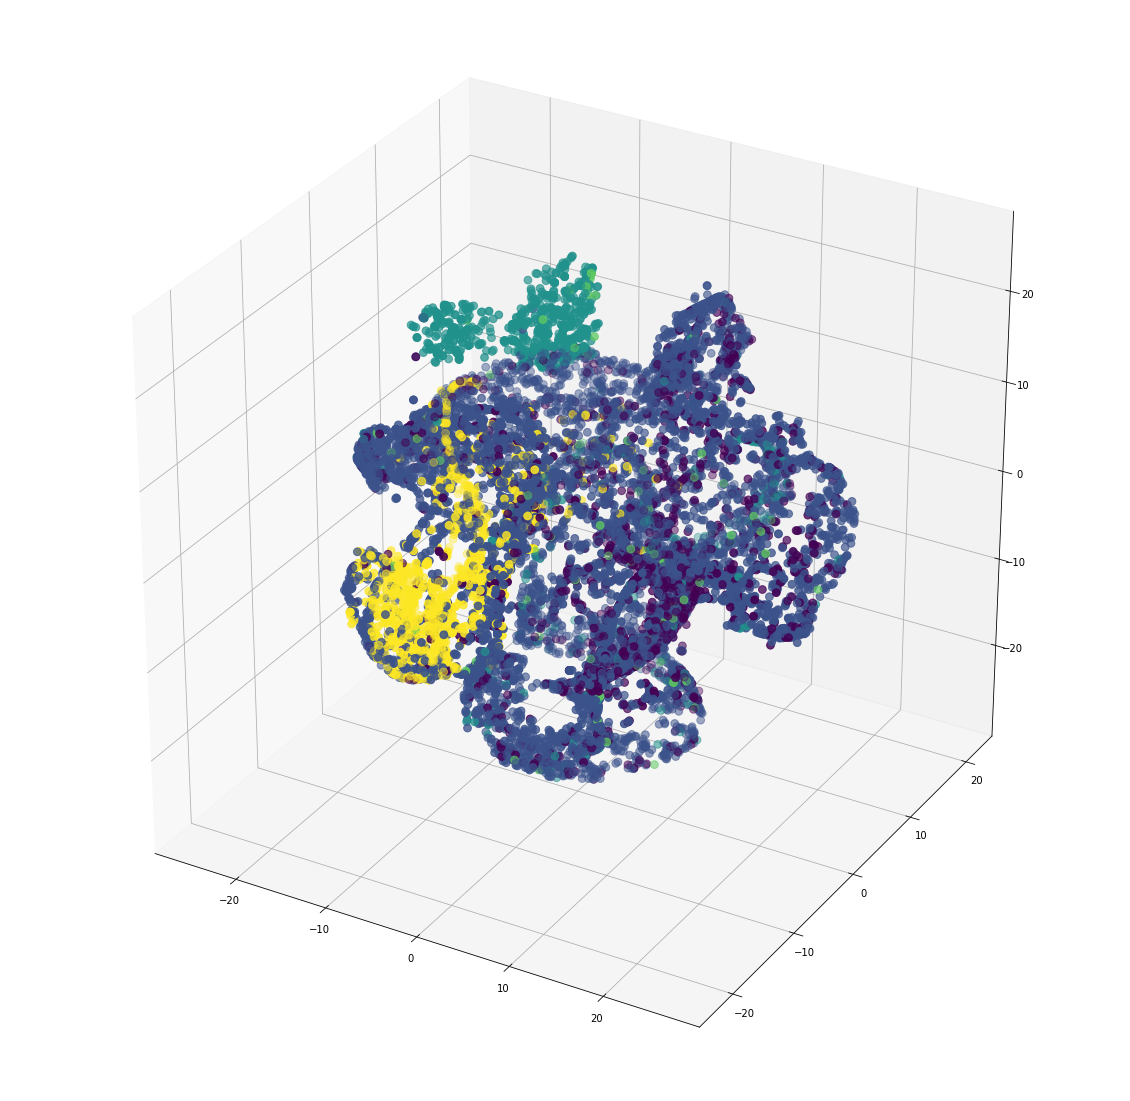

In [ ]:
# 3D TSNE plot

pca_kmeans_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2', 'comp3'])
pca_kmeans_tsne['label'] = y_kmeans

fig2 = plt.figure(figsize=(20,20))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(pca_kmeans_tsne['comp1'], pca_kmeans_tsne['comp2'], pca_kmeans_tsne['comp3'], c=pca_kmeans_tsne['label'], s=60)
plt.show()

## **DBScan Clustering**

In [ ]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(reduced_X)
distances, indices = nbrs.kneighbors(reduced_X)

In [ ]:
dbsc = DBSCAN(eps = 1, min_samples = 10).fit(reduced_X)

#Get the cluster labels
labels = dbsc.labels_

#Identify the core and border points
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

# Get predicted ys
y_dbscan = dbsc.fit_predict(reduced_X)

In [ ]:
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{-1: 143, 0: 10454, 1: 1637, 2: 28, 3: 52, 4: 16}

In [ ]:
unique_labels = np.unique(labels)
colors = ["red", "yellow", "green","black","blue","orange","purple"]

Text(0.5, 1.0, 'DBSCAN on Purchase data')

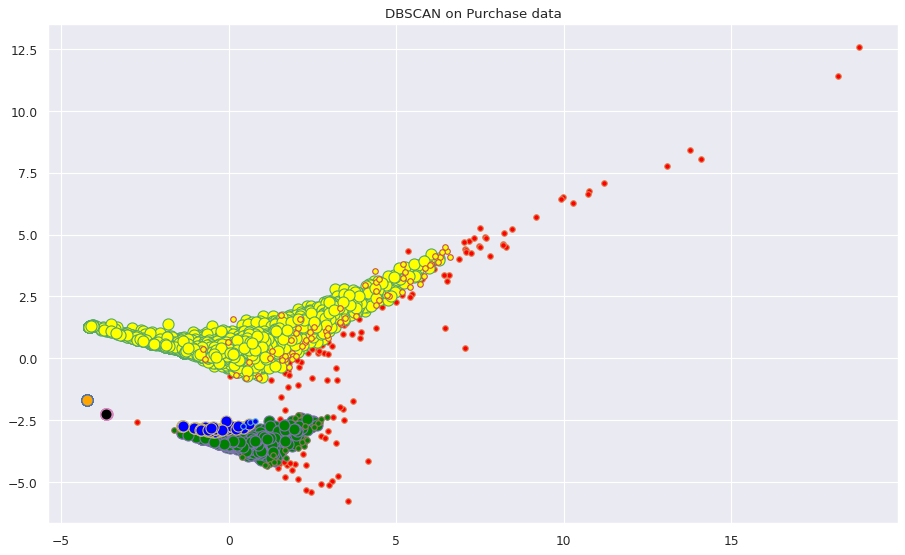

In [ ]:
figure(num=None, figsize=(13.7, 8.27), dpi=80, facecolor='w', edgecolor='k')

for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = reduced_X[class_member_mask & core_samples]
    plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    xy2 = reduced_X[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markerfacecolor = color, markersize = 5)
plt.title("DBSCAN on Purchase data")

Plot PCA transformed DBSCAN clusters using TSNE

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=3, verbose=1, perplexity=30, n_iter=1000, learning_rate=100)
tsne_results = tsne.fit_transform(reduced_X)

pca_dbscan_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2', 'comp3'])
pca_dbscan_tsne['label'] = y_dbscan

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12330 samples in 0.011s...
[t-SNE] Computed neighbors for 12330 samples in 0.509s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12330
[t-SNE] Computed conditional probabilities for sample 2000 / 12330
[t-SNE] Computed conditional probabilities for sample 3000 / 12330
[t-SNE] Computed conditional probabilities for sample 4000 / 12330
[t-SNE] Computed conditional probabilities for sample 5000 / 12330
[t-SNE] Computed conditional probabilities for sample 6000 / 12330
[t-SNE] Computed conditional probabilities for sample 7000 / 12330
[t-SNE] Computed conditional probabilities for sample 8000 / 12330
[t-SNE] Computed conditional probabilities for sample 9000 / 12330
[t-SNE] Computed conditional probabilities for sample 10000 / 12330
[t-SNE] Computed conditional probabilities for sample 11000 / 12330
[t-SNE] Computed conditional probabilities for sample 12000 / 12330
[t-SNE] Computed conditional probabilities for sam

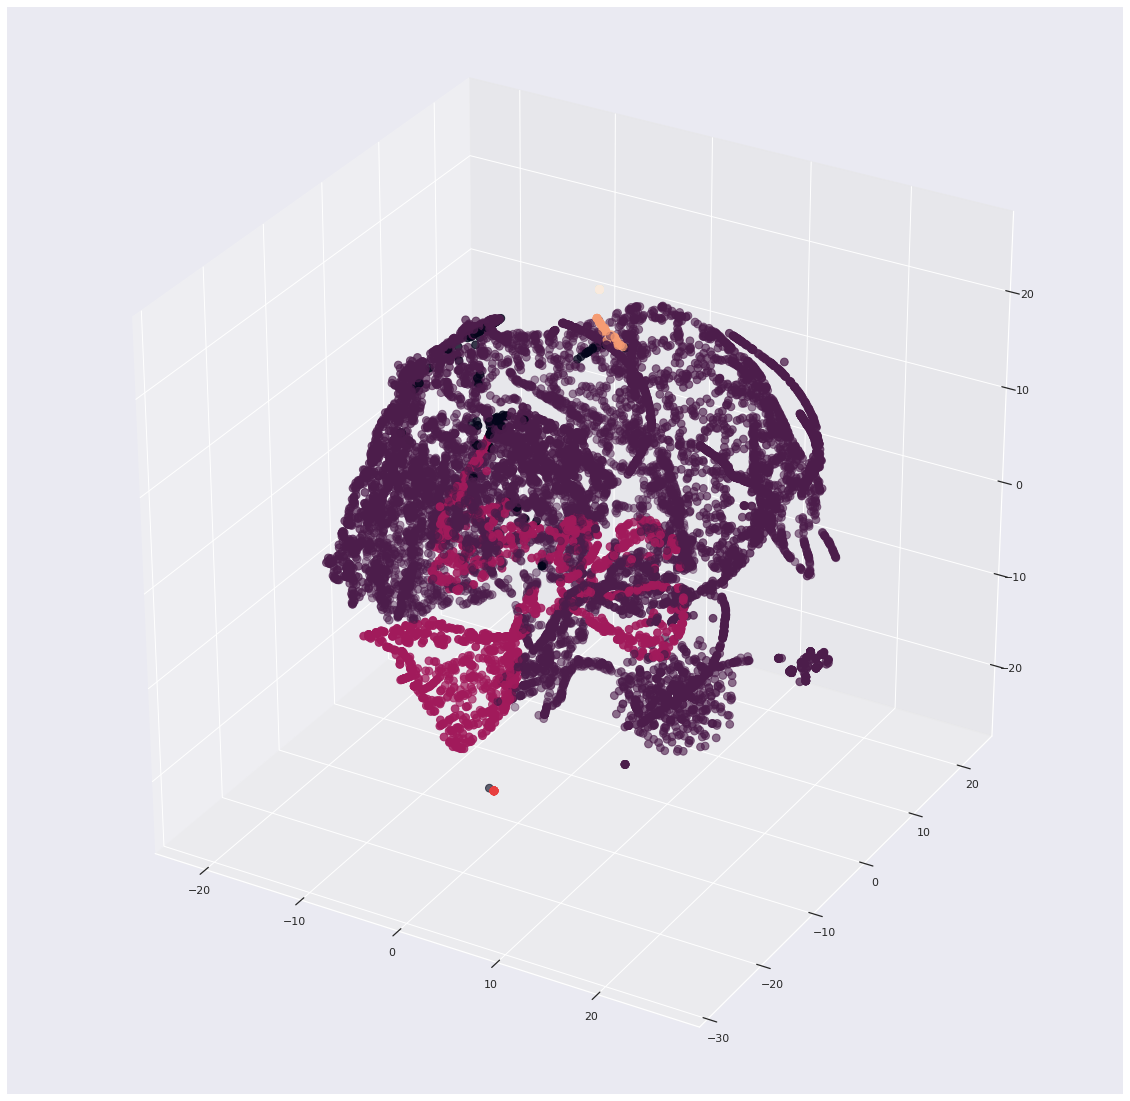

In [ ]:
# 3D TSNE plot

fig3 = plt.figure(figsize=(20,20))
ax3 = fig3.add_subplot(111, projection='3d')
ax3.scatter(pca_dbscan_tsne['comp1'], pca_dbscan_tsne['comp2'], pca_dbscan_tsne['comp3'], c=pca_dbscan_tsne['label'], s=60)
plt.show()

# Modeling

#### Logistic Regression

Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. It is a special case of linear regression where the target variable is categorical in nature. It uses a log of odds as the dependent variable. Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function.

In [ ]:
# Seperatig Label column and assigning it to variable y
y = new_file['Revenue']
print(y.head())
print(y.value_counts())

0    0
1    0
2    0
3    0
4    0
Name: Revenue, dtype: int64
0    10422
1     1908
Name: Revenue, dtype: int64


In [ ]:
# Splitting training and testing dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [ ]:
# Simple Logistic Regression Model
logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

# pull out probabilities
probs = logistic_model.predict_proba(X_test)[::,1]

# check confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2029,   60],
       [ 244,  133]])

Text(0.5, 257.44, 'Predicted label')

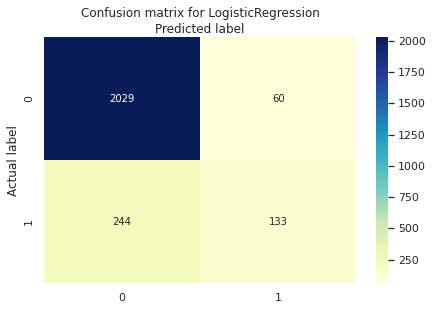

In [ ]:
# plot confusion heatmap
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for LogisticRegression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
Report_LogisticRegression = metrics.classification_report(y_test, y_pred)
print(Report_LogisticRegression)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2089
           1       0.69      0.35      0.47       377

    accuracy                           0.88      2466
   macro avg       0.79      0.66      0.70      2466
weighted avg       0.86      0.88      0.86      2466



- Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances.
- Recall (also known as sensitivity) is the fraction of relevant instances that have been retrieved over the total amount of relevant instances. Both precision and recall are therefore based on an understanding and measure of relevance.

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.8767234387672344
Precision: 0.689119170984456
Recall: 0.35278514588859416


In [ ]:
# Evaluate the model using 10-fold cross-validation
scores = cross_val_score(logistic_model, X_test, y_test, scoring='roc_auc', cv=10)
print("CV score for each fold:", scores)
print("mean CV score:", scores.mean())

CV score for each fold: [0.86665827 0.86111811 0.87975321 0.90052883 0.85608159 0.92885923
 0.8278087  0.90094401 0.83395836 0.80111212]
mean CV score: 0.8656822432359137


- Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity. 1 is good, perfect classification. 0.5 is worthless.

AUC for LogisticRegression: 0.887789139270627


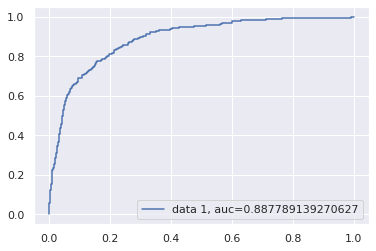

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, probs)
auc = metrics.roc_auc_score(y_test, probs)
print("AUC for LogisticRegression:", auc)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Advantages Because of its efficient and straightforward nature, doesn't require high computation power, easy to implement, easily interpretable, used widely by data analyst and scientist. Also, it doesn't require scaling of features. Logistic regression provides a probability score for observations.

Disadvantages Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.

#### Logistic Regression Cross-Validation

In [ ]:
# Logistic Regression Cross-Validation Model
logistic_cv_model = LogisticRegressionCV(cv=10, max_iter=2000)
logistic_cv_model.fit(X_train, y_train)
y_pred = logistic_cv_model.predict(X_test)
y_pred_train = logistic_cv_model.predict(X_train)

# pull out probabilities
probs = logistic_cv_model.predict_proba(X_test)[::,1]

# check confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2032,   57],
       [ 247,  130]])

Text(0.5, 257.44, 'Predicted label')

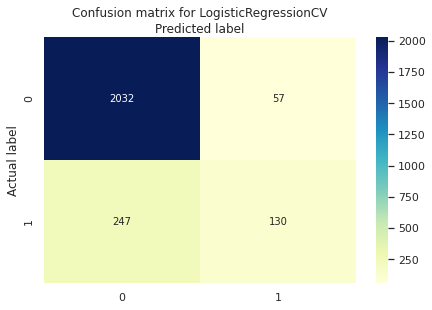

In [ ]:
# plot confusion heatmap
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for LogisticRegressionCV', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
Report_LogisticRegressionCV = metrics.classification_report(y_test, y_pred)
print(Report_LogisticRegressionCV)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2089
           1       0.70      0.34      0.46       377

    accuracy                           0.88      2466
   macro avg       0.79      0.66      0.70      2466
weighted avg       0.86      0.88      0.86      2466



In [ ]:
# test dataset
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.8767234387672344
Precision: 0.6951871657754011
Recall: 0.3448275862068966


In [ ]:
# train dataset
print("Accuracy:", metrics.accuracy_score(y_train, y_pred_train))
print("Precision:", metrics.precision_score(y_train, y_pred_train))
print("Recall:", metrics.recall_score(y_train, y_pred_train))

Accuracy: 0.8871654501216545
Precision: 0.76125
Recall: 0.39777922926192033


AUC for LogisticRegressionCV: 0.8880380114100259


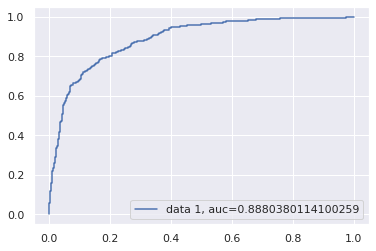

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, probs)
auc = metrics.roc_auc_score(y_test, probs)
print("AUC for LogisticRegressionCV:", auc)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Logistic Regression with SGD training

This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).

In [ ]:
# Logistic regression with SGD training Model
logistic_SGD_model = SGDClassifier(loss='log', max_iter=2000, tol=1e-3)
logistic_SGD_model.fit(X_train, y_train)
y_pred = logistic_SGD_model.predict(X_test)

# pull out probabilities
probs = logistic_SGD_model.predict_proba(X_test)[::,1]

# check confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2083,    6],
       [ 334,   43]])

Text(0.5, 257.44, 'Predicted label')

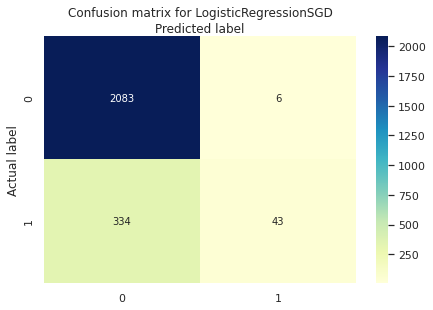

In [ ]:
# plot confusion heatmap
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for LogisticRegressionSGD', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
Report_LogisticRegressionSGD = metrics.classification_report(y_test, y_pred)
print(Report_LogisticRegressionSGD)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2089
           1       0.88      0.11      0.20       377

    accuracy                           0.86      2466
   macro avg       0.87      0.56      0.56      2466
weighted avg       0.86      0.86      0.81      2466



In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.862124898621249
Precision: 0.8775510204081632
Recall: 0.11405835543766578


In [ ]:
# Evaluate the model using 10-fold cross-validation
scores = cross_val_score(logistic_SGD_model, X_test, y_test, scoring='roc_auc', cv=10)
print("CV score for each fold:", scores)
print("mean CV score:", scores.mean())

CV score for each fold: [0.39524049 0.73948628 0.55691262 0.45139763 0.76403928 0.77650466
 0.39587551 0.82839778 0.48881417 0.60662098]
mean CV score: 0.6003289391880112


AUC for LogisticRegressionSGD: 0.5555930838940363


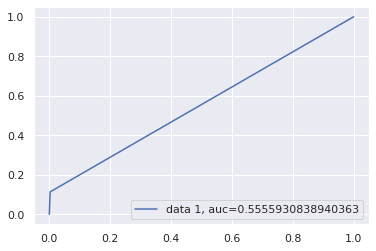

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, probs)
auc = metrics.roc_auc_score(y_test, probs)
print("AUC for LogisticRegressionSGD:", auc)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Random Forest Classifier

In [ ]:
# Grid Search to find best param for Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_map = {
    "n_estimators": [100,200,300,400,500],
    "max_depth": [5,7,10,12]
}

# initiate RandomForestClassifier
rf = RandomForestClassifier()

# initiate Grid Search
gs = GridSearchCV(rf, param_map, cv=10, verbose = 1, n_jobs = 4)

# Fit dt to the training set
gs.fit(X_train, y_train)
print(gs.best_params_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   59.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  5.8min
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:  6.2min finished


{'max_depth': 12, 'n_estimators': 500}


In [ ]:
# check all params' test score
validation_metric = pd.DataFrame(gs.cv_results_['params'], index=range(1,21))
validation_metric['mean_test_score'] = gs.cv_results_['mean_test_score']
validation_metric.sort_values('mean_test_score', ascending=False)

max_depth  n_estimators  mean_test_score
20         12           500         0.903993
17         12           200         0.903790
18         12           300         0.903688
16         12           100         0.902269
19         12           400         0.901560
14         10           400         0.900039
12         10           200         0.899837
11         10           100         0.899634
13         10           300         0.899633
15         10           500         0.899228
8           7           300         0.884934
9           7           400         0.883109
7           7           200         0.881589
10          7           500         0.881285
6           7           100         0.878851
3           5           300         0.857055
4           5           400         0.856852
5           5           500         0.856346
1           5           100         0.854826
2           5           200         0.854825

In [ ]:
# save the best model and compute y_pred
rf_model = gs.best_estimator_
y_pred = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

# pull out probabilities
probs = rf_model.predict_proba(X_test)[::,1]

# check confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2046,   43],
       [ 208,  169]])

Text(0.5, 257.44, 'Predicted label')

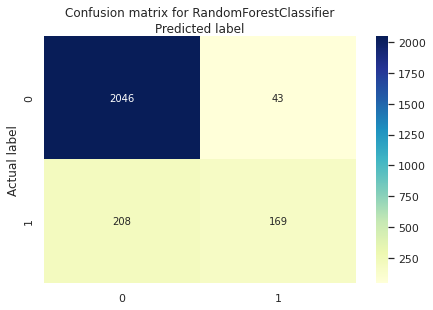

In [ ]:
# plot confusion heatmap
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for RandomForestClassifier', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
Report_RandomForestClassifier = metrics.classification_report(y_test, y_pred)
print(Report_RandomForestClassifier)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2089
           1       0.80      0.45      0.57       377

    accuracy                           0.90      2466
   macro avg       0.85      0.71      0.76      2466
weighted avg       0.89      0.90      0.89      2466



In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.8982157339821574
Precision: 0.7971698113207547
Recall: 0.4482758620689655


In [ ]:
print("Accuracy:", metrics.accuracy_score(y_train, y_pred_train))
print("Precision:", metrics.precision_score(y_train, y_pred_train))
print("Recall:", metrics.recall_score(y_train, y_pred_train))

Accuracy: 0.954176804541768
Precision: 0.987353206865402
Recall: 0.7139124755062051


In [ ]:
# Evaluate the model using 10-fold cross-validation
scores = cross_val_score(rf_model, X_test, y_test, scoring='roc_auc', cv=10)
print("CV score for each fold:", scores)
print("mean CV score:", scores.mean())

CV score for each fold: [0.92294132 0.92558549 0.94736842 0.92155628 0.88076051 0.92810375
 0.90080972 0.93301435 0.88102935 0.8529678 ]
mean CV score: 0.9094137015189647


AUC for RandomForestClassifier: 0.917596656986895


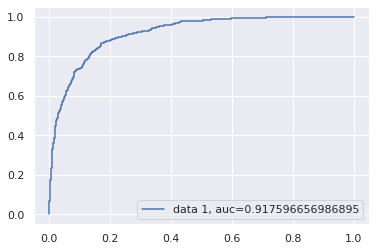

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, probs)
auc = metrics.roc_auc_score(y_test, probs)
print("AUC for RandomForestClassifier:", auc)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Create a pd.Series of features importances
importances_rf = pd.Series(rf_model.feature_importances_, index = X.columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values(ascending=False) 
sorted_importances_rf[:20]

PageValues                       0.436933
ExitRates                        0.073442
ProductRelated_Duration          0.070893
ProductRelated                   0.055945
BounceRates                      0.042830
Administrative_Duration          0.040407
Administrative                   0.035055
Month_Nov                        0.025858
Informational_Duration           0.023295
Informational                    0.014685
VisitorType_Returning_Visitor    0.011056
VisitorType_New_Visitor          0.010761
TrafficType_2                    0.008557
Weekend                          0.007186
Region_1                         0.006654
OperatingSystems_2               0.006137
Month_May                        0.005890
Browser_2                        0.005711
Region_3                         0.005359
OperatingSystems_3               0.005040
dtype: float64

#### Classification with Support Vector Machines

In [ ]:
# SVM with different kernels
from sklearn import svm

C = 1.0  # SVM regularization parameter
# svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', C=C).fit(X_train, y_train)
# poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_train, y_train)
# lin_svc = svm.LinearSVC(C=C, loss='squared_hinge').fit(X_train, y_train)

# save the best model and compute y_pred
# y_pred_svc = svc.predict(X_test)
y_pred_svc_rbf = rbf_svc.predict(X_test)
y_pred_svc_rbf_train = rbf_svc.predict(X_train)
# y_pred_svc_poly = poly_svc.predict(X_test)
# y_pred_svc_lin = lin_svc.predict(X_test)

# calculate scores for AUC
score_svc_rbf = rbf_svc.decision_function(X_test)

# check confusion matrix
cnf_matrix_rbf = metrics.confusion_matrix(y_test, y_pred_svc_rbf)
# cnf_matrix_poly = metrics.confusion_matrix(y_test, y_pred_svc_poly)

Text(0.5, 257.44, 'Predicted label')

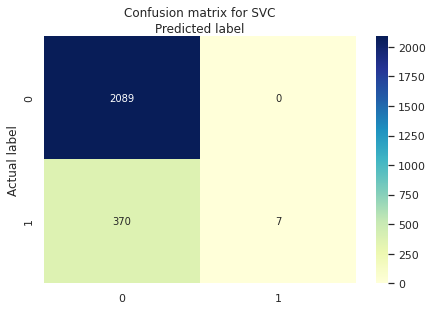

In [ ]:
# plot confusion heatmap
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_rbf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for SVC', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
Report_SVC_rbf = metrics.classification_report(y_test, y_pred_svc_rbf)
print(Report_SVC_rbf)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2089
           1       1.00      0.02      0.04       377

    accuracy                           0.85      2466
   macro avg       0.92      0.51      0.48      2466
weighted avg       0.87      0.85      0.78      2466



AUC for RandomForestClassifier: 0.8040881058163704


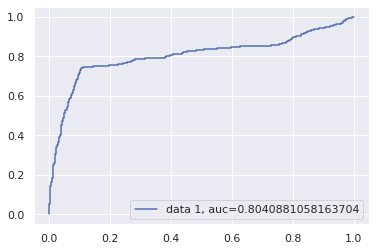

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, score_svc_rbf)
auc = metrics.roc_auc_score(y_test, score_svc_rbf)
print("AUC for RandomForestClassifier:", auc)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# test dataset
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_svc_rbf))
print("Precision:", metrics.precision_score(y_test, y_pred_svc_rbf))
print("Recall:", metrics.recall_score(y_test, y_pred_svc_rbf))

Accuracy: 0.8499594484995945
Precision: 1.0
Recall: 0.01856763925729443


In [ ]:
# train dataset
print("Accuracy:", metrics.accuracy_score(y_train, y_pred_svc_rbf_train))
print("Precision:", metrics.precision_score(y_train, y_pred_svc_rbf_train))
print("Recall:", metrics.recall_score(y_train, y_pred_svc_rbf_train))

Accuracy: 0.8471208434712084
Precision: 0.9259259259259259
Recall: 0.016329196603527107


In [ ]:
# Evaluate the model using 10-fold cross-validation
scores = cross_val_score(rbf_svc, X_test, y_test, scoring='accuracy', cv=10)
print("CV score for each fold:", scores)
print("mean CV score:", scores.mean())

CV score for each fold: [0.84615385 0.84615385 0.84615385 0.84615385 0.84615385 0.84615385
 0.84552846 0.8495935  0.8495935  0.8495935 ]
mean CV score: 0.8471232020012508


#### Gradient Boost Implementation

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.



In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
# Instantiate gb
gb = GradientBoostingClassifier(max_depth=4,
                               n_estimators=200,
                               random_state=2)
# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_test_pred_gboost = gb.predict(X_test)

# Predict test set labels
y_train_pred_gboost = gb.predict(X_train)

# pull out probabilities
probs = gb.predict_proba(X_train)[::,1]


# check confusion matrix
cnf_matrix = metrics.confusion_matrix(y_train, y_train_pred_gboost)
cnf_matrix


#Calculating the accuracy score
print("Test set statistics")
print(accuracy_score(y_test,y_test_pred_gboost))
pd.crosstab(y_test,y_test_pred_gboost)

print("Train set statistics")
print(accuracy_score(y_train,y_train_pred_gboost))
pd.crosstab(y_train,y_train_pred_gboost)


Test set statistics
0.8937550689375506
Train set statistics
0.9507299270072993


col_0       0     1
Revenue            
0        8193   140
1         346  1185

In [ ]:
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores =  cross_val_score(gb, X_train, y_train, cv=10, 
                                  scoring='accuracy', 
                                  n_jobs=-1) 

print("Accuracy: %0.2f (+/- %0.2f)" % (MSE_CV_scores.mean(), MSE_CV_scores.std() * 2))

Accuracy: 0.90 (+/- 0.02)


Text(0.5, 257.44, 'Predicted label')

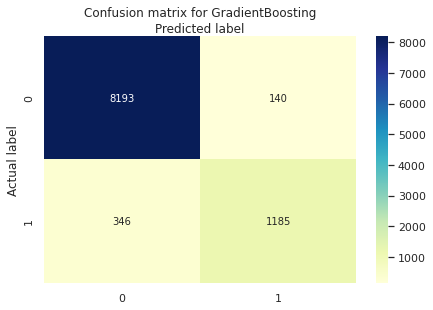

In [ ]:
# plot confusion heatmap
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for GradientBoosting', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
Report_GradientBoosting = metrics.classification_report(y_train, y_train_pred_gboost)
print(Report_GradientBoosting)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8333
           1       0.89      0.77      0.83      1531

    accuracy                           0.95      9864
   macro avg       0.93      0.88      0.90      9864
weighted avg       0.95      0.95      0.95      9864



In [ ]:
print("Accuracy:", metrics.accuracy_score(y_train, y_train_pred_gboost))
print("Precision:", metrics.precision_score(y_train, y_train_pred_gboost))
print("Recall:", metrics.recall_score(y_train, y_train_pred_gboost))

Accuracy: 0.9507299270072993
Precision: 0.8943396226415095
Recall: 0.7740039190071848


AUC for GradientBoosting: 0.975152343781537


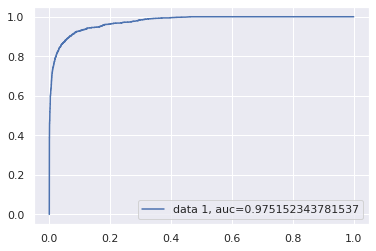

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_train, probs)
auc = metrics.roc_auc_score(y_train, probs)
print("AUC for GradientBoosting:", auc)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Xgboost Implementation

Extreme gradient boosting is a specific implementation of gradient boosting model.The most important differentiating factor is computation of second order derivative of the loss function

In [ ]:
# Instantiate XGB
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

# Predict test set labels
y_test_pred_gboost = model.predict(X_test)

# Predict test set labels
y_train_pred_gboost = model.predict(X_train)

# pull out probabilities
probs = model.predict_proba(X_train)[::,1]


# check confusion matrix
cnf_matrix = metrics.confusion_matrix(y_train, y_train_pred_gboost)
cnf_matrix


#Calculating the accuracy score
print("Test set statistics")
print(accuracy_score(y_test,y_test_pred_gboost))
pd.crosstab(y_test,y_test_pred_gboost)

print("Train set statistics")
print(accuracy_score(y_train,y_train_pred_gboost))
pd.crosstab(y_train,y_train_pred_gboost)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Test set statistics
0.9006488240064883
Train set statistics
0.9192011354420113


col_0       0     1
Revenue            
0        8050   283
1         514  1017

In [ ]:
y_train_pred = model.predict(X_train)
predictions = [round(value) for value in y_train_pred]

accuracy = accuracy_score(y_train, predictions)
print("Train Accuracy: %.2f%%" % (accuracy * 100.0))

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))

Train Accuracy: 91.92%
Test Accuracy: 90.06%


In [ ]:
# Need to decide on the methodology to decide on the CV score
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores =  cross_val_score(model, X_train, y_train, cv=10, 
                                  scoring='accuracy', 
                                  n_jobs=-1) 

print("Accuracy: %0.2f (+/- %0.2f)" % (MSE_CV_scores.mean(), MSE_CV_scores.std() * 2))

Accuracy: 0.91 (+/- 0.02)


Text(0.5, 257.44, 'Predicted label')

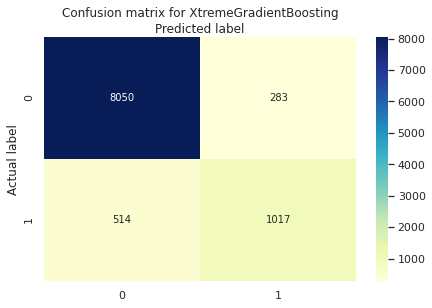

In [ ]:
# plot confusion heatmap
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for XtremeGradientBoosting', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
ReportXGradientBoosting = metrics.classification_report(y_train, y_train_pred_gboost)
print(ReportXGradientBoosting)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      8333
           1       0.78      0.66      0.72      1531

    accuracy                           0.92      9864
   macro avg       0.86      0.82      0.84      9864
weighted avg       0.92      0.92      0.92      9864



In [ ]:
print("Accuracy:", metrics.accuracy_score(y_train, y_train_pred_gboost))
print("Precision:", metrics.precision_score(y_train, y_train_pred_gboost))
print("Recall:", metrics.recall_score(y_train, y_train_pred_gboost))

Accuracy: 0.9192011354420113
Precision: 0.7823076923076923
Recall: 0.6642717178314826


AUC for XGradientBoosting: 0.95041469849519


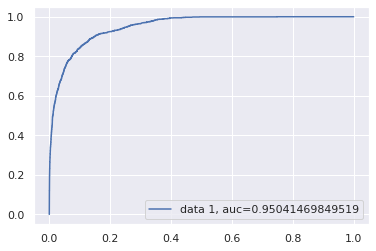

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_train, probs)
auc = metrics.roc_auc_score(y_train, probs)
print("AUC for XGradientBoosting:", auc)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Create a pd.Series of features importances
importances_rf = pd.Series(model.feature_importances_, index = X.columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values(ascending=False) 
sorted_importances_rf[:20]

PageValues                       0.306528
VisitorType_Returning_Visitor    0.137903
Month_Nov                        0.047868
BounceRates                      0.042043
Month_Mar                        0.040913
Month_May                        0.039966
Month_Dec                        0.026964
VisitorType_New_Visitor          0.025044
ProductRelated                   0.023888
Administrative                   0.022969
ExitRates                        0.020603
TrafficType_2                    0.019401
Weekend                          0.018720
ProductRelated_Duration          0.018507
Administrative_Duration          0.014315
TrafficType_4                    0.013805
TrafficType_8                    0.012987
Month_Aug                        0.012405
OperatingSystems_2               0.012321
Informational_Duration           0.011620
dtype: float32

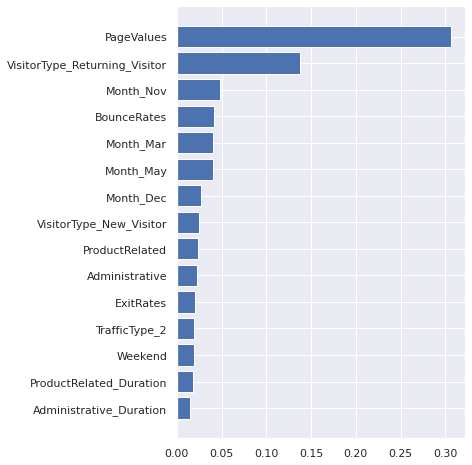

In [ ]:
fig = plt.figure(figsize=(4,6))
plt.title("Feature importances")
ax = fig.add_axes([0,0,1,1])
names = sorted_importances_rf.index[:15]
importances = sorted_importances_rf.values[:15]

# change to horizontal
y_pos = np.arange(len(names))
plt.barh(y_pos, importances)
plt.gca().invert_yaxis()

# Create names on the y-axis
plt.yticks(y_pos, names)

plt.show()

## Modeling on Balanced dataset

For handling the imbalance dataset there are different techniques.
1. Under sampling
2. Over sampling
3. Synthetic Minority Over Sampling (SMOTE)

I followed the below youtube video link which clearly explains the difference with practical way to sample the dataset and also explains by applying
model on the imbalanced data set and then balanced dataset. I highly recommend waching this video.

https://www.youtube.com/watch?v=dkXB8HH_4-k

Before balancing the y label, I will have to encode the labels and convert them from string to numerical categorical data.

In [ ]:
# The categorical columns are converted into dummies
from sklearn.preprocessing import LabelEncoder

filename = df_copy
enc = LabelEncoder()
filename.loc[:,['Weekend', 'Revenue']] = \
filename.loc[:,['Weekend', 'Revenue']].apply(enc.fit_transform)

import pandas as pd
filename = pd.get_dummies(data=filename, columns=['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType'])

In [ ]:
# Check the label encoded dataset
filename.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'OperatingSystems_1', 'OperatingSystems_2',
       'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_5',
       'OperatingSystems_6', 'OperatingSystems_7', 'OperatingSystems_8',
       'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5',
       'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10',
       'Browser_11', 'Browser_12', 'Browser_13', 'Region_1', 'Region_2',
       'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8',
       'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3',
       'TrafficType_4', 'TrafficType_5', 'TrafficType_6', '

In [ ]:
# Checking the label encoded y label
filename.Revenue.value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [ ]:
# Passing the cleaned dataset to a new variable
new_file = filename
new_file.shape

(12330, 75)

In [ ]:
# Seperating Features and assigning it to variable X
X = new_file.drop('Revenue', axis=1)

In [ ]:
# using StandardScaler on all continous variable features (except dummies)
from sklearn.preprocessing import StandardScaler

X_scaled = X.copy()
col_names = ['Administrative', 'Administrative_Duration', 'Informational_Duration', 'Informational',
             'ProductRelated', 'ProductRelated_Duration', 
             'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
features = X[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_scaled[col_names] = features
X_scaled.head(10)

Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   
5       -0.696993                -0.457191      -0.396478   
6       -0.696993                -0.457191      -0.396478   
7       -0.395938                -0.457191      -0.396478   
8       -0.696993                -0.457191      -0.396478   
9       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   
5               -0.244931       -0.286270                -0.543757   
6               -0.244931       -0.691003                -0.624348   
7               -0.244931       -0.713488                -0.624348   
8               -0.244931       -0.668518                -0.605012   
9               -0.244931       -0.646033                -0.238685   

   BounceRates  ExitRates  PageValues  SpecialDay  Weekend  Month_Aug  \
0     3.667189   3.229316   -0.317178   -0.308821        0          0   
1    -0.457683   1.171473   -0.317178   -0.308821        0          0   
2     3.667189   3.229316   -0.317178   -0.308821        0          0   
3     0.573535   1.994610   -0.317178   -0.308821        0          0   
4    -0.045196   0.142551   -0.317178   -0.308821        1          0   
5    -0.132035  -0.380935   -0.317178   -0.308821        0          0   
6     3.667189   3.229316   -0.317178    1.702146        0          0   
7     3.667189   3.229316   -0.317178   -0.308821        1          0   
8    -0.457683   1.171473   -0.317178    3.713114        0          0   
9    -0.457683  -0.429072   -0.317178    1.702146        0          0   

   Month_Dec  Month_Feb  Month_Jul  Month_June  Month_Mar  Month_May  \
0          0          1          0           0          0          0   
1          0          1          0           0          0          0   
2          0          1          0           0          0          0   
3          0          1          0           0          0          0   
4          0          1          0           0          0          0   
5          0          1          0           0          0          0   
6          0          1          0           0          0          0   
7          0          1          0           0          0          0   
8          0          1          0           0          0          0   
9          0          1          0           0          0          0   

   Month_Nov  Month_Oct  Month_Sep  OperatingSystems_1  OperatingSystems_2  \
0          0          0          0                   1                   0   
1          0          0          0                   0                   1   
2          0          0          0                   0                   0   
3          0          0          0                   0                   0   
4          0          0          0                   0                   0   
5          0          0          0                   0                   1   
6          0          0          0                   0                   1   
7          0          0          0                   1                   0   
8          0          0          0                   0                   1   
9          0          0          0                   0                   1   

   OperatingSystems_3  OperatingSystems_4  OperatingSystems_5  \
0                   0                  

In [ ]:
# Seperatig Label column and assigning it to variable y
y = new_file['Revenue']
print(y.head())
print(y.value_counts())

0    0
1    0
2    0
3    0
4    0
Name: Revenue, dtype: int64
0    10422
1     1908
Name: Revenue, dtype: int64


In [ ]:
# Splitting training and testing dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [ ]:
# Import SMOTE function and apply it to train dataset
from imblearn.over_sampling import SMOTE

# Set the desired ratio=0.6 of the number of samples in the minority class over the number of samples in the majority class
smote = SMOTE(sampling_strategy=0.5)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# Assigning the train and test variable to a new SMOTE train and test variable
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'), y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Finding the y_train values and comparing it after smoting
from collections import Counter
print("Before Smote: ", Counter(y_train))
print("After Smote: ", Counter(y_train_smote))

Before Smote:  Counter({0: 8333, 1: 1531})
After Smote:  Counter({0: 8333, 1: 4166})


As we can see above before applying smote the count of 1 was comparatively very lower then 0.

After applying smote the count of 1 equals to the count of 0. Using this we can balance our train data and can further apply model.

In [ ]:
X_train_smote.shape

(12499, 74)

#### Logistic Regression

Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. It is a special case of linear regression where the target variable is categorical in nature. It uses a log of odds as the dependent variable. Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [ ]:
# Simple Logistic Regression Model
logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(X_train_smote, y_train_smote)
y_pred = logistic_model.predict(X_test)
y_pred_train = logistic_model.predict(X_train_smote)

# pull out probabilities
probs = logistic_model.predict_proba(X_test)[::,1]
probs_train = logistic_model.predict_proba(X_train_smote)[::,1]

# check confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1971,  118],
       [ 155,  222]])

Text(0.5, 257.44, 'Predicted label')

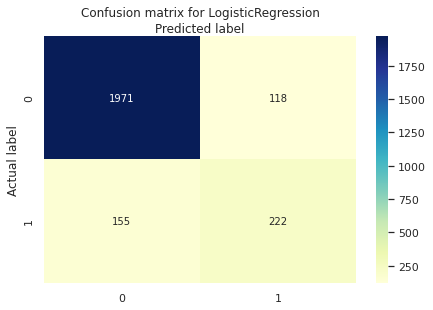

In [ ]:
# plot confusion heatmap
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for LogisticRegression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
Report_LogisticRegression = metrics.classification_report(y_test, y_pred)
print(Report_LogisticRegression)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2089
           1       0.65      0.59      0.62       377

    accuracy                           0.89      2466
   macro avg       0.79      0.77      0.78      2466
weighted avg       0.89      0.89      0.89      2466



In [ ]:
# test dataset
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.889294403892944
Precision: 0.6529411764705882
Recall: 0.5888594164456233


- Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances.
- Recall (also known as sensitivity) is the fraction of relevant instances that have been retrieved over the total amount of relevant instances. Both precision and recall are therefore based on an understanding and measure of relevance.

In [ ]:
# Evaluate the model using 10-fold cross-validation
scores = cross_val_score(logistic_model, X_test, y_test, scoring='roc_auc', cv=10)
print("CV score for each fold:", scores)
print("mean CV score:", scores.mean())

CV score for each fold: [0.86665827 0.86111811 0.87975321 0.90052883 0.85608159 0.92885923
 0.8278087  0.90094401 0.83395836 0.80111212]
mean CV score: 0.8656822432359137


- Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity. 1 is good, perfect classification. 0.5 is worthless.

AUC for LogisticRegression: 0.893708740872043


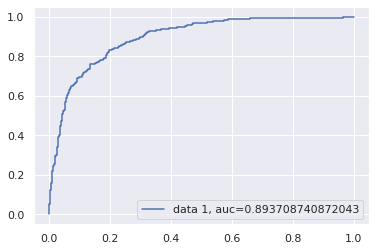

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, probs)
auc = metrics.roc_auc_score(y_test, probs)
print("AUC for LogisticRegression:", auc)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
metrics.roc_auc_score(y_train_smote, probs_train)

0.9199349635051173

Advantages Because of its efficient and straightforward nature, doesn't require high computation power, easy to implement, easily interpretable, used widely by data analyst and scientist. Also, it doesn't require scaling of features. Logistic regression provides a probability score for observations.

Disadvantages Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.

#### Logistic Regression Cross-Validation

In [ ]:
# Logistic Regression Cross-Validation Model
logistic_cv_model = LogisticRegressionCV(cv=10, max_iter=2000)
logistic_cv_model.fit(X_train_smote, y_train_smote)
y_pred = logistic_cv_model.predict(X_test)
y_pred_train = logistic_cv_model.predict(X_train_smote)

# pull out probabilities
probs = logistic_cv_model.predict_proba(X_test)[::,1]
probs_train = logistic_cv_model.predict_proba(X_train_smote)[::,1]

# check confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1980,  109],
       [ 158,  219]])

Text(0.5, 257.44, 'Predicted label')

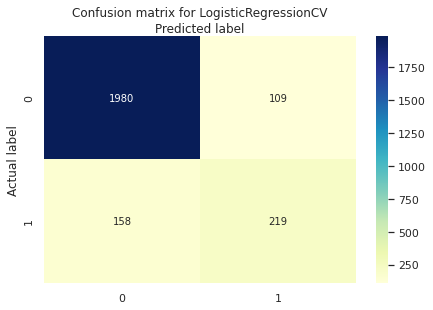

In [ ]:
# plot confusion heatmap
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for LogisticRegressionCV', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
Report_LogisticRegressionCV = metrics.classification_report(y_test, y_pred)
print(Report_LogisticRegressionCV)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2089
           1       0.67      0.58      0.62       377

    accuracy                           0.89      2466
   macro avg       0.80      0.76      0.78      2466
weighted avg       0.89      0.89      0.89      2466



In [ ]:
# test dataset
print("AUC:", metrics.roc_auc_score(y_test, probs))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

AUC: 0.8975383244048337
Accuracy: 0.8917274939172749
Precision: 0.6676829268292683
Recall: 0.5809018567639257


In [ ]:
# train dataset
print("AUC:", metrics.roc_auc_score(y_train_smote, probs_train))
print("Accuracy:", metrics.accuracy_score(y_train_smote, y_pred_train))
print("Precision:", metrics.precision_score(y_train_smote, y_pred_train))
print("Recall:", metrics.recall_score(y_train_smote, y_pred_train))

AUC: 0.9221041813348001
Accuracy: 0.8378270261620929
Precision: 0.8428983648605323
Recall: 0.6310609697551608


AUC for LogisticRegressionCV: 0.8975383244048337


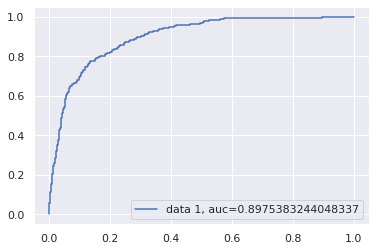

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, probs)
auc = metrics.roc_auc_score(y_test, probs)
print("AUC for LogisticRegressionCV:", auc)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Logistic Regression with SGD training

This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).

In [ ]:
# Logistic regression with SGD training Model
logistic_SGD_model = SGDClassifier(loss='log', max_iter=2000, tol=1e-3)
logistic_SGD_model.fit(X_train_smote, y_train_smote)
y_pred = logistic_SGD_model.predict(X_test)

# pull out probabilities
probs = logistic_SGD_model.predict_proba(X_test)[::,1]

# check confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 818, 1271],
       [  25,  352]])

Text(0.5, 257.44, 'Predicted label')

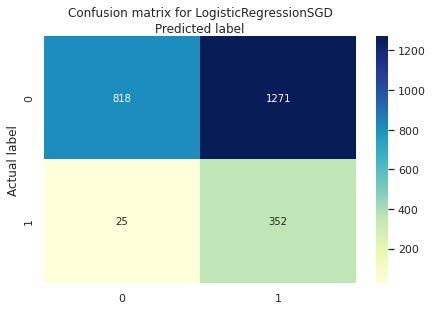

In [ ]:
# plot confusion heatmap
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for LogisticRegressionSGD', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
Report_LogisticRegressionSGD = metrics.classification_report(y_test, y_pred)
print(Report_LogisticRegressionSGD)

              precision    recall  f1-score   support

           0       0.97      0.39      0.56      2089
           1       0.22      0.93      0.35       377

    accuracy                           0.47      2466
   macro avg       0.59      0.66      0.45      2466
weighted avg       0.86      0.47      0.53      2466



In [ ]:
# test dataset
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.4744525547445255
Precision: 0.21688231669747382
Recall: 0.9336870026525199


In [ ]:
# Evaluate the model using 10-fold cross-validation
scores = cross_val_score(logistic_SGD_model, X_test, y_test, scoring='roc_auc', cv=10)
print("CV score for each fold:", scores)
print("mean CV score:", scores.mean())

CV score for each fold: [0.52014606 0.58763536 0.56887434 0.54495089 0.7338202  0.86376228
 0.49898785 0.77434372 0.57338678 0.51493599]
mean CV score: 0.6180843469624634


AUC for LogisticRegressionSGD: 0.6632137773584762


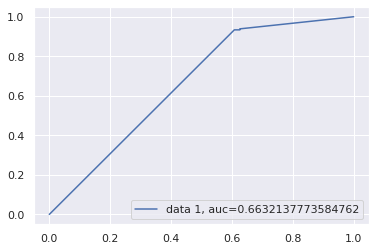

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, probs)
auc = metrics.roc_auc_score(y_test, probs)
print("AUC for LogisticRegressionSGD:", auc)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Random Forest Classifier


In [ ]:
# Grid Search to find best param for Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_map = {
    "n_estimators": [100,200,300,400,500],
    "max_depth": [5,7,10,12]
}

# initiate RandomForestClassifier
rf = RandomForestClassifier()

# initiate Grid Search
gs = GridSearchCV(rf, param_map, cv=10, verbose = 1, n_jobs = 4)

# Fit dt to the training set
gs.fit(X_train_smote, y_train_smote)
print(gs.best_params_)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  8.1min
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:  8.7min finished


{'max_depth': 12, 'n_estimators': 400}


In [ ]:
# check all params' test score
validation_metric = pd.DataFrame(gs.cv_results_['params'], index=range(1,21))
validation_metric['mean_test_score'] = gs.cv_results_['mean_test_score']
validation_metric.sort_values('mean_test_score', ascending=False)

max_depth  n_estimators  mean_test_score
19         12           400         0.919197
20         12           500         0.919117
18         12           300         0.918797
17         12           200         0.918637
12         10           200         0.918637
16         12           100         0.917757
13         10           300         0.917117
15         10           500         0.916397
14         10           400         0.916077
11         10           100         0.914957
7           7           200         0.909756
10          7           500         0.908316
8           7           300         0.907596
6           7           100         0.907437
9           7           400         0.905676
2           5           200         0.895996
4           5           400         0.893676
5           5           500         0.893675
3           5           300         0.891035
1           5           100         0.890875

In [ ]:
# save the best model and compute y_pred
rf_model = gs.best_estimator_
y_pred = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train_smote)

# pull out probabilities
probs = rf_model.predict_proba(X_test)[::,1]

# check confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1991,   98],
       [ 164,  213]])

Text(0.5, 257.44, 'Predicted label')

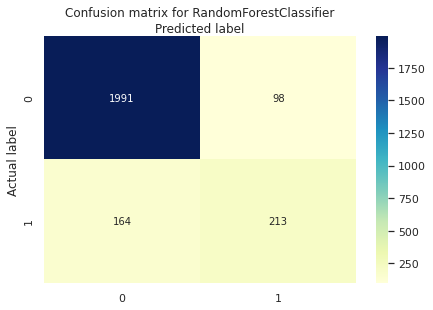

In [ ]:
# plot confusion heatmap
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for RandomForestClassifier', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
Report_RandomForestClassifier = metrics.classification_report(y_test, y_pred)
print(Report_RandomForestClassifier)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2089
           1       0.68      0.56      0.62       377

    accuracy                           0.89      2466
   macro avg       0.80      0.76      0.78      2466
weighted avg       0.89      0.89      0.89      2466



In [ ]:
# test dataset
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.8937550689375506
Precision: 0.684887459807074
Recall: 0.5649867374005305


In [ ]:
# train dataset
print("Accuracy:", metrics.accuracy_score(y_train_smote, y_pred_train))
print("Precision:", metrics.precision_score(y_train_smote, y_pred_train))
print("Recall:", metrics.recall_score(y_train_smote, y_pred_train))

Accuracy: 0.9626370109608768
Precision: 0.9652830188679246
Recall: 0.9210273643783006


In [ ]:
# Evaluate the model using 10-fold cross-validation
scores = cross_val_score(rf_model, X_test, y_test, scoring='roc_auc', cv=10)
print("CV score for each fold:", scores)
print("mean CV score:", scores.mean())

CV score for each fold: [0.92017124 0.92054898 0.94472425 0.92923697 0.875724   0.92357089
 0.89903846 0.93598862 0.88193457 0.85309712]
mean CV score: 0.9084035092518471


AUC for RandomForestClassifier: 0.9188067342769312


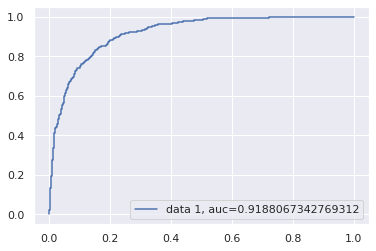

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, probs)
auc = metrics.roc_auc_score(y_test, probs)
print("AUC for RandomForestClassifier:", auc)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Extract features importances
importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_test.columns[i] for i in indices]


In [ ]:
# Create a pd.Series of features importances
importances_rf = pd.Series(rf_model.feature_importances_, index = X.columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values(ascending=False) 
sorted_importances_rf[:20]

PageValues                       0.392596
Month_Nov                        0.062037
TrafficType_2                    0.042896
ExitRates                        0.042484
ProductRelated_Duration          0.038154
Administrative                   0.031921
ProductRelated                   0.031619
OperatingSystems_2               0.031180
Administrative_Duration          0.026298
VisitorType_Returning_Visitor    0.025369
Month_May                        0.022960
VisitorType_New_Visitor          0.022947
BounceRates                      0.021381
Region_1                         0.017558
OperatingSystems_3               0.015176
TrafficType_1                    0.013666
Browser_2                        0.012474
OperatingSystems_1               0.012423
Weekend                          0.011686
Informational                    0.010869
dtype: float64

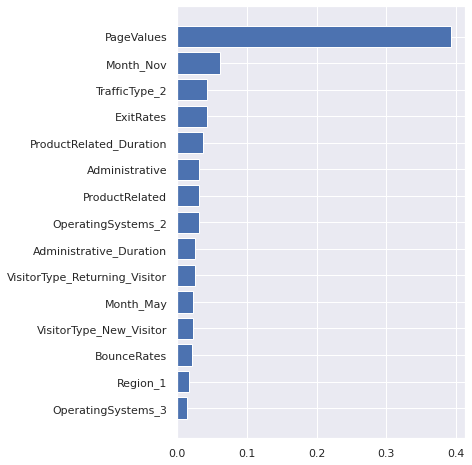

In [ ]:
fig = plt.figure(figsize=(4,6))
plt.title("Feature importances")
ax = fig.add_axes([0,0,1,1])
names = sorted_importances_rf.index[:15]
importances = sorted_importances_rf.values[:15]

# change to horizontal
y_pos = np.arange(len(names))
plt.barh(y_pos, importances)
plt.gca().invert_yaxis()

# Create names on the y-axis
plt.yticks(y_pos, names)

plt.show()

#### Classification with Support Vector Machines

In [ ]:
# SVM with different kernels
from sklearn import svm

C = 1.0  # SVM regularization parameter
# svc = svm.SVC(kernel='linear', C=C).fit(X_train_smote, y_train_smote)
rbf_svc = svm.SVC(kernel='rbf', C=C, ).fit(X_train_smote, y_train_smote)
# poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_train_smote, y_train_smote)
# lin_svc = svm.LinearSVC(C=C, loss='squared_hinge').fit(X_train_smote, y_train_smote)

# save the best model and compute y_pred
# y_pred_svc = svc.predict(X_test)
y_pred_svc_rbf = rbf_svc.predict(X_test)
y_pred_svc_rbf_train = rbf_svc.predict(X_train_smote)
# y_pred_svc_poly = poly_svc.predict(X_test)
# y_pred_svc_lin = lin_svc.predict(X_test)

# calculate scores for AUC
score_svc_rbf = rbf_svc.decision_function(X_test)

# check confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svc_rbf)
cnf_matrix

array([[1989,  100],
       [ 268,  109]])

Text(0.5, 257.44, 'Predicted label')

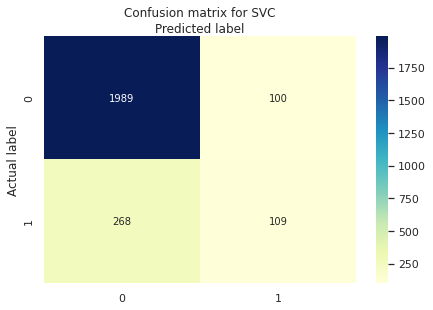

In [ ]:
# plot confusion heatmap
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for SVC', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
Report_SVC = metrics.classification_report(y_test, y_pred_svc_rbf)
print(Report_SVC)

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2089
           1       0.52      0.29      0.37       377

    accuracy                           0.85      2466
   macro avg       0.70      0.62      0.64      2466
weighted avg       0.83      0.85      0.83      2466



AUC for RandomForestClassifier: 0.8314221392084087


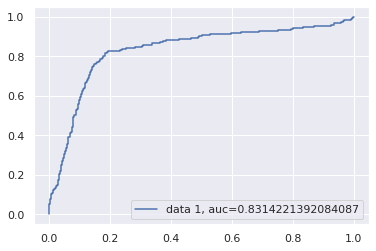

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, score_svc_rbf)
auc = metrics.roc_auc_score(y_test, score_svc_rbf)
print("AUC for RandomForestClassifier:", auc)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# test dataset
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_svc_rbf))
print("Precision:", metrics.precision_score(y_test, y_pred_svc_rbf))
print("Recall:", metrics.recall_score(y_test, y_pred_svc_rbf))

Accuracy: 0.8507704785077048
Precision: 0.5215311004784688
Recall: 0.2891246684350133


In [ ]:
# train data
print("Accuracy:", metrics.accuracy_score(y_train_smote, y_pred_svc_rbf_train))
print("Precision:", metrics.precision_score(y_train_smote, y_pred_svc_rbf_train))
print("Recall:", metrics.recall_score(y_train_smote, y_pred_svc_rbf_train))

Accuracy: 0.7254180334426754
Precision: 0.7305276381909548
Recall: 0.27916466634661546


In [ ]:
# Evaluate the model using 10-fold cross-validation
scores = cross_val_score(rbf_svc, X_test, y_test, scoring='accuracy', cv=10)
print("CV score for each fold:", scores)
print("mean CV score:", scores.mean())

CV score for each fold: [0.84615385 0.84615385 0.84615385 0.84615385 0.84615385 0.84615385
 0.84552846 0.8495935  0.8495935  0.8495935 ]
mean CV score: 0.8471232020012508


## Gradient Boost Modeling

In [ ]:
# Instantiate gb
gb = GradientBoostingClassifier(max_depth=4,
                               n_estimators=200,
                               random_state=2)

# Fit gb to the training set
gb.fit(X_train_smote, y_train_smote)


# Predict test set labels
y_test_pred_gboost = gb.predict(X_test)


# Predict test set labels
y_train_pred_gboost = gb.predict(X_train_smote)

# pull out probabilities
probs = gb.predict_proba(X_train_smote)[::,1]


# check confusion matrix
cnf_matrix = metrics.confusion_matrix(y_train_smote, y_train_pred_gboost)
cnf_matrix


#Calculating the accuracy score
print("Test set statistics")
print(accuracy_score(y_test,y_test_pred_gboost))
pd.crosstab(y_test,y_test_pred_gboost)

print("Train set statistics")
print(accuracy_score(y_train_smote,y_train_pred_gboost))
pd.crosstab(y_train_smote,y_train_pred_gboost)


Test set statistics
0.8933495539334956
Train set statistics
0.9562364989199136


col_0     0     1
row_0            
0      8127   206
1       341  3825

In [ ]:
# Need to decide on the methodology to decide on the CV score
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores =  cross_val_score(gb, X_train_smote, y_train_smote, cv=10, 
                                  scoring='accuracy', 
                                  n_jobs=-1) 

print("Accuracy: %0.2f (+/- %0.2f)" % (MSE_CV_scores.mean(), MSE_CV_scores.std() * 2))

Accuracy: 0.92 (+/- 0.11)


Text(0.5, 257.44, 'Predicted label')

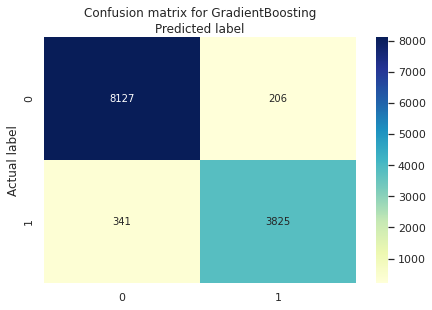

In [ ]:
# plot confusion heatmap
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for GradientBoosting', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
ReportGradientBoosting = metrics.classification_report(y_train_smote, y_train_pred_gboost)
print(ReportGradientBoosting)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8333
           1       0.95      0.92      0.93      4166

    accuracy                           0.96     12499
   macro avg       0.95      0.95      0.95     12499
weighted avg       0.96      0.96      0.96     12499



In [ ]:
print("Accuracy:", metrics.accuracy_score(y_train_smote, y_train_pred_gboost))
print("Precision:", metrics.precision_score(y_train_smote, y_train_pred_gboost))
print("Recall:", metrics.recall_score(y_train_smote, y_train_pred_gboost))

Accuracy: 0.9562364989199136
Precision: 0.9488960555693376
Recall: 0.9181469035045607


AUC for GradientBoosting: 0.989485191505596


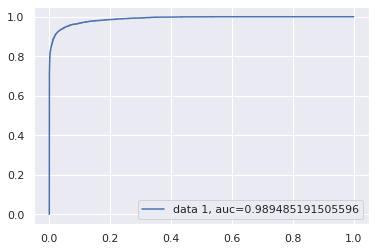

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_train_smote, probs)
auc = metrics.roc_auc_score(y_train_smote, probs)
print("AUC for GradientBoosting:", auc)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## XGboost Implementation

In [ ]:
# Instantiate XGB
X_test = X_test.values
model = XGBClassifier()
model.fit(X_train_smote, y_train_smote)
print(model)

# Predict test set labels
y_test_pred_gboost = model.predict(X_test)

# Predict test set labels
y_train_pred_gboost = model.predict(X_train_smote)

# pull out probabilities
probs = model.predict_proba(X_train_smote)[::,1]


# check confusion matrix
cnf_matrix = metrics.confusion_matrix(y_train_smote, y_train_pred_gboost)
cnf_matrix


#Calculating the accuracy score
print("Test set statistics")
print(accuracy_score(y_test,y_test_pred_gboost))
pd.crosstab(y_test,y_test_pred_gboost)

print("Train set statistics")
print(accuracy_score(y_train_smote,y_train_pred_gboost))
pd.crosstab(y_train_smote,y_train_pred_gboost)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Test set statistics
0.8913219789132197
Train set statistics
0.9281542523401872


col_0     0     1
row_0            
0      7923   410
1       488  3678

In [ ]:
# Need to decide on the methodology to decide on the CV score
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores =  cross_val_score(model, X_train_smote, y_train_smote, cv=10, 
                                  scoring='accuracy', 
                                  n_jobs=-1) 

print("Accuracy: %0.2f (+/- %0.2f)" % (MSE_CV_scores.mean(), MSE_CV_scores.std() * 2))

Accuracy: 0.92 (+/- 0.10)


Text(0.5, 257.44, 'Predicted label')

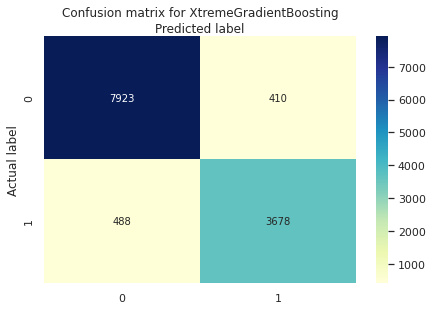

In [ ]:
# plot confusion heatmap
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for XtremeGradientBoosting', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
ReportXGradientBoosting = metrics.classification_report(y_train_smote, y_train_pred_gboost)
print(ReportXGradientBoosting)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      8333
           1       0.90      0.88      0.89      4166

    accuracy                           0.93     12499
   macro avg       0.92      0.92      0.92     12499
weighted avg       0.93      0.93      0.93     12499



In [ ]:
print("Accuracy:", metrics.accuracy_score(y_train_smote, y_train_pred_gboost))
print("Precision:", metrics.precision_score(y_train_smote, y_train_pred_gboost))
print("Recall:", metrics.recall_score(y_train_smote, y_train_pred_gboost))

Accuracy: 0.9281542523401872
Precision: 0.899706457925636
Recall: 0.8828612578012482


AUC for XtremeGradientBoosting: 0.9787280689499303


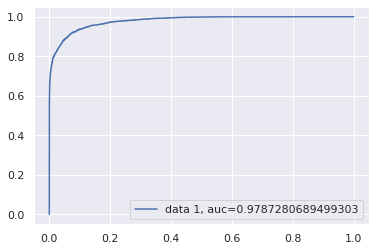

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_train_smote, probs)
auc = metrics.roc_auc_score(y_train_smote, probs)
print("AUC for XtremeGradientBoosting:", auc)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<Figure size 1096x661.6 with 0 Axes>

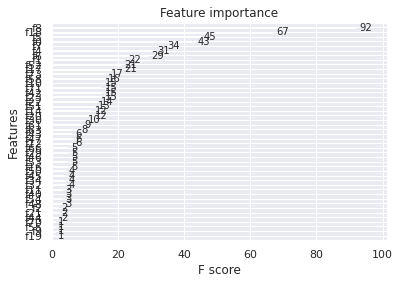

In [ ]:
from   matplotlib.pyplot import figure
import matplotlib.pyplot as plt

figure(num=None, figsize=(13.7, 8.27), dpi=80, facecolor='w', edgecolor='k')
plt.show(plot_importance(model))

In [ ]:
# Create a pd.Series of features importances
importances_rf = pd.Series(model.feature_importances_, index = X.columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values(ascending=False) 
sorted_importances_rf[:20]

PageValues                       0.292886
TrafficType_2                    0.081090
Month_Nov                        0.056046
Region_1                         0.045981
VisitorType_Returning_Visitor    0.045035
OperatingSystems_2               0.043648
Month_May                        0.031625
TrafficType_1                    0.029672
Browser_2                        0.027164
Month_Dec                        0.025027
TrafficType_3                    0.023971
VisitorType_New_Visitor          0.022728
OperatingSystems_1               0.022146
Month_Mar                        0.021516
Weekend                          0.018520
OperatingSystems_3               0.015710
Administrative                   0.013142
Month_Sep                        0.011152
Browser_1                        0.011113
ProductRelated                   0.011081
dtype: float32

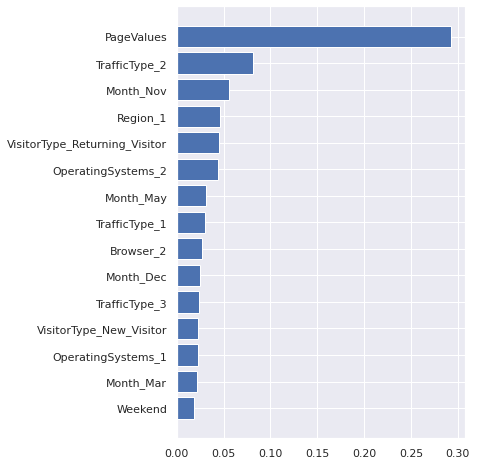

In [ ]:
fig = plt.figure(figsize=(4,6))
plt.title("Feature importances")
ax = fig.add_axes([0,0,1,1])
names = sorted_importances_rf.index[:15]
importances = sorted_importances_rf.values[:15]

# change to horizontal
y_pos = np.arange(len(names))
plt.barh(y_pos, importances)
plt.gca().invert_yaxis()

# Create names on the y-axis
plt.yticks(y_pos, names)

plt.show()